# Import Library

In [ ]:
!pip install --upgrade gdown
!gdown 1cZdq7C3tfNL3uwKOtCD1mHgfqGYvaWE7
!gdown 1vLzt9hKmyqv_xYd1nKqxjeGT3qqpsa54

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=1cZdq7C3tfNL3uwKOtCD1mHgfqGYvaWE7
To: /content/Data Train.csv
100% 388k/388k [00:00<00:00, 36.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vLzt9hKmyqv_xYd1nKqxjeGT3qqpsa54
To: /content/Data Test.csv
100% 69.3k/69.3k [00:00<00:00, 41.8MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import altair as alt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Read Dataset

In [ ]:
df = pd.read_csv('Data Train.csv')
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


## Referensi

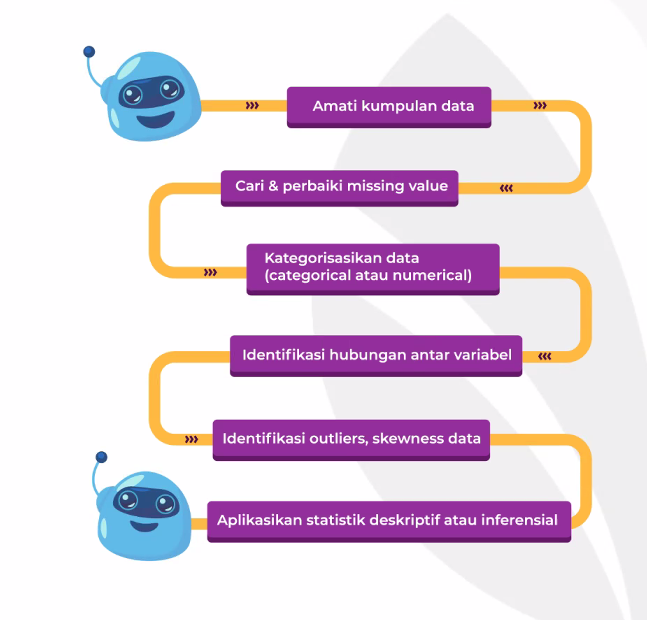

# Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
baris, kolom = df.shape
print('Dataset ini terdiri dari: ')
print(f'{baris} baris')
print(f'{kolom} kolom')

Dataset ini terdiri dari: 
4250 baris
20 kolom


## 1. Data Quality Check

In [ ]:
list_items = []
for col in df.columns:
  list_items.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:5]])
desc_df = pd.DataFrame(data=list_items, columns= 'Feature, Data Type, Null, Null %, Unique, Unique Sample'.split(','))
desc_df

,Feature,Data Type,Null,Null %,Unique,Unique Sample
0,state,object,0,0.0,51,"[OH, NJ, OK, MA, MO]"
1,account_length,int64,0,0.0,215,"[107, 137, 84, 75, 121]"
2,area_code,object,0,0.0,3,"[area_code_415, area_code_408, area_code_510]"
3,international_plan,object,0,0.0,2,"[no, yes]"
4,voice_mail_plan,object,0,0.0,2,"[yes, no]"
5,number_vmail_messages,int64,0,0.0,46,"[26, 0, 24, 37, 27]"
6,total_day_minutes,float64,0,0.0,1843,"[161.6, 243.4, 299.4, 166.7, 218.2]"
7,total_day_calls,int64,0,0.0,120,"[123, 114, 71, 113, 88]"
8,total_day_charge,float64,0,0.0,1843,"[27.47, 41.38, 50.9, 28.34, 37.09]"
9,total_eve_minutes,float64,0,0.0,1773,"[195.5, 121.2, 61.9, 148.3, 348.5]"


In [ ]:
# cek data duplicate
print('Jumlah data duplicate: ', df.duplicated().sum())

Jumlah data duplicate:  0


**Insight:** Dataset ini tidak terdapat nilai missing dan juga data duplikat,sehingga ada beberapa tahapan preprocessing yang bisa dilewati. Selain itu, isi dataset ini juga tidak terlihat keanehan.

## 2. Descriptive Statistic

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00


**Insight :** Dari tabel tersebut, kita dapat melihat bahwa rata-rata panjang akun pelanggan adalah sekitar 100 hari dengan rentang 1 hingga 243 hari, sementara mayoritas pelanggan tidak memiliki pesan voicemail. Penggunaan menit dan panggilan pada siang hari dan malam hari memiliki distribusi yang serupa, dengan rata-rata penggunaan sekitar 180 menit dan 100 panggilan untuk siang hari, serta sekitar 200 menit dan panggilan untuk malam hari. Biaya pada siang hari rata-rata sekitar $30. Penggunaan internasional memiliki rata-rata sekitar 10 menit dengan biaya panggilan rata-rata sekitar $2.77. Jumlah panggilan ke layanan pelanggan rata-rata adalah sekitar 1.56.

In [ ]:
df.describe(exclude= np.number).T

,count,unique,top,freq
state,4250,51,WV,139
area_code,4250,3,area_code_415,2108
international_plan,4250,2,no,3854
voice_mail_plan,4250,2,no,3138
churn,4250,2,no,3652


**Insight:** Dari tabel tersebut terdapat 4250 entri dengan 51 nilai unik untuk negara bagian, dengan 'WV' (West Virginia) menjadi yang paling umum dengan frekuensi 139. Kode area '415' muncul paling sering dengan frekuensi 2108 dari total 4250 entri. Sebagian besar pelanggan, yaitu 3854 dari 4250, tidak memiliki rencana internasional, dan 3138 dari 4250 juga tidak memiliki rencana voicemail. Mayoritas pelanggan, sebanyak 3652 dari 4250, tidak berhenti berlangganan layanan, menunjukkan tingkat retensi yang tinggi.

In [ ]:
nums = df.select_dtypes(include=[np.number]).columns
cats = df.select_dtypes(exclude=[np.number]).columns

### 2.1 Univariat Analysis

#### 2.1.1 Categorical Data

#### Frequency Plot

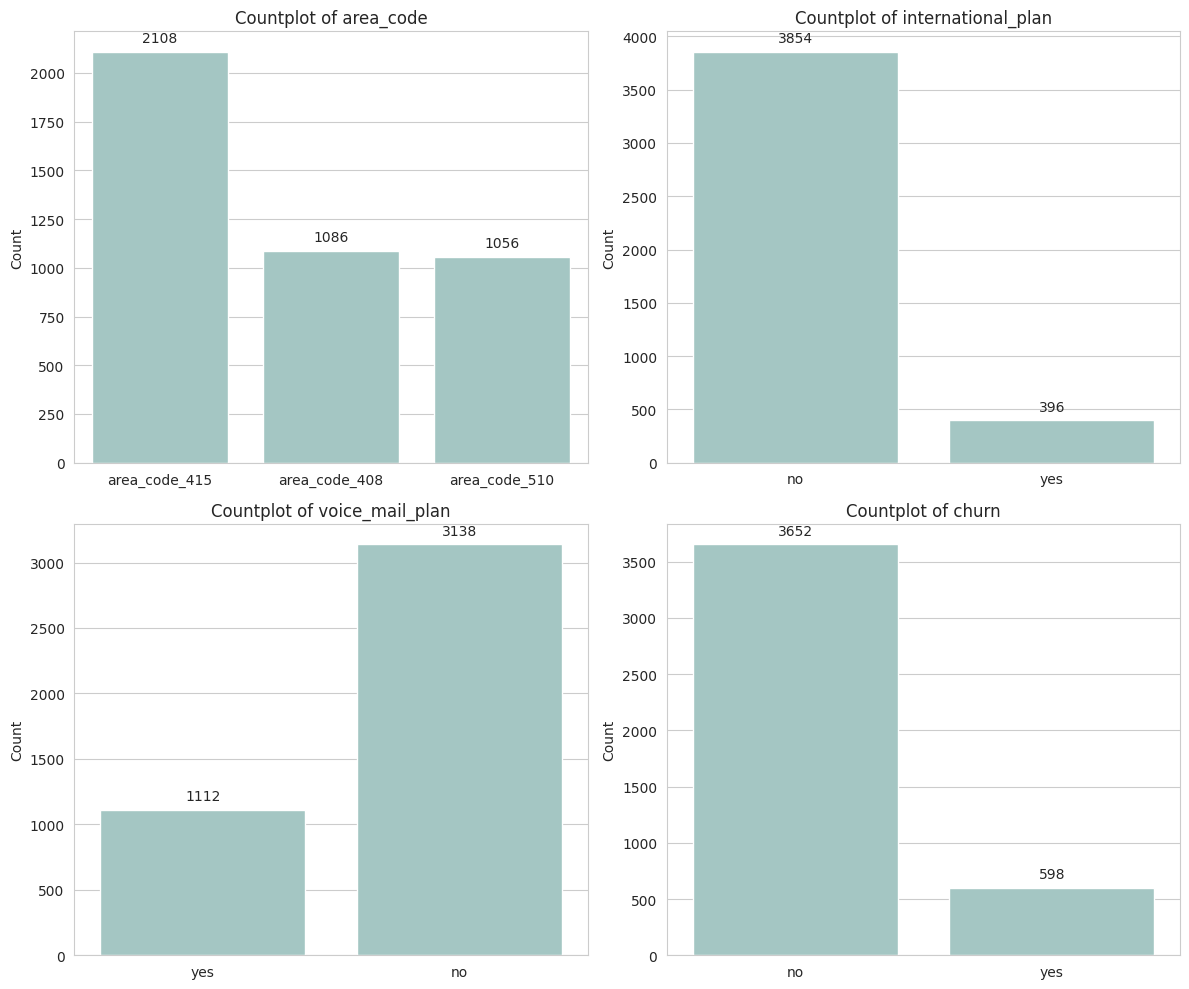

In [ ]:
cats_1 = ['area_code', 'international_plan', 'voice_mail_plan', 'churn']

color = '#9eccc8'

sns.set_style("whitegrid")

fig, axes = plt.subplots(len(cats)//2, 2, figsize=(12, 10))

axes = axes.flatten()

for i, cat in enumerate(cats_1):
    sns.countplot(x=cat, data=df, ax=axes[i], color=color)
    axes[i].set_title(f'Countplot of {cat}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

    for p in axes[i].patches:
        axes[i].annotate(format(p.get_height(), '.0f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 10),
                         textcoords = 'offset points')

plt.tight_layout()
plt.show()


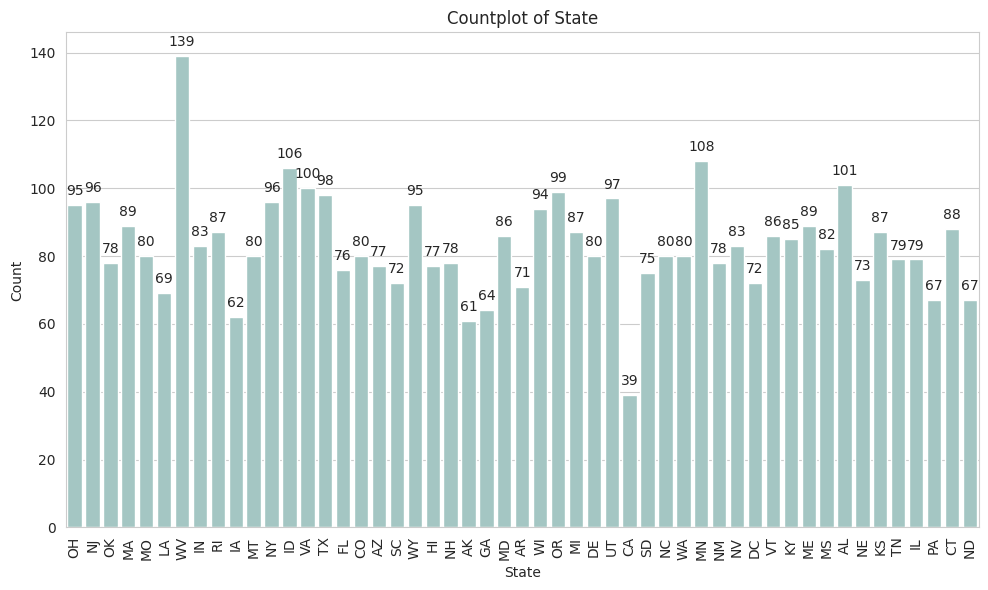

In [ ]:
color = '#9eccc8'

sns.set_style("whitegrid")

# Create countplot for the 'state' column
plt.figure(figsize=(10, 6))
sns.countplot(x='state', data=df, color=color)
plt.title('Countplot of State')
plt.xlabel('State')
plt.ylabel('Count')

# Show the count values on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 10),
                       textcoords = 'offset points')

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.tight_layout()
plt.show()


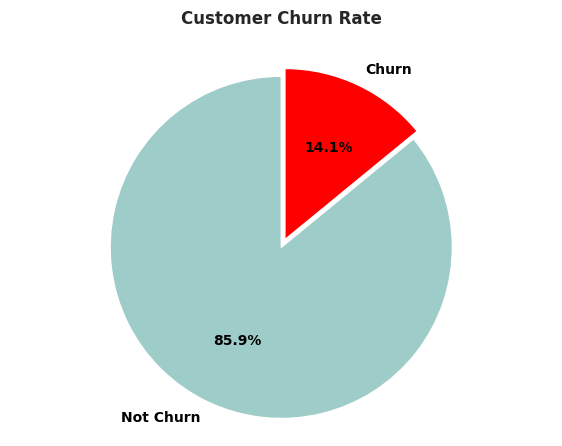

In [ ]:
churn_rate = df['churn'].value_counts()
explode = (0.05, 0)
text_props = {'color': 'black', 'weight': 'bold'}

plt.figure(figsize=(7, 5))
plt.pie(churn_rate, labels=['Not Churn', 'Churn'], autopct='%1.1f%%', startangle=90, explode = explode, colors = [ '#9eccc8', '#ff0000'], textprops=text_props)
plt.axis('equal')
plt.title('Customer Churn Rate', fontweight='bold', pad=20)
plt.show()

**Insight:** Dari total 4250 pelanggan,14,1% meninggalkan layanan dan 85.9% masih menggunkn telekomunikasi

#### 2.1.2 Numerical Data

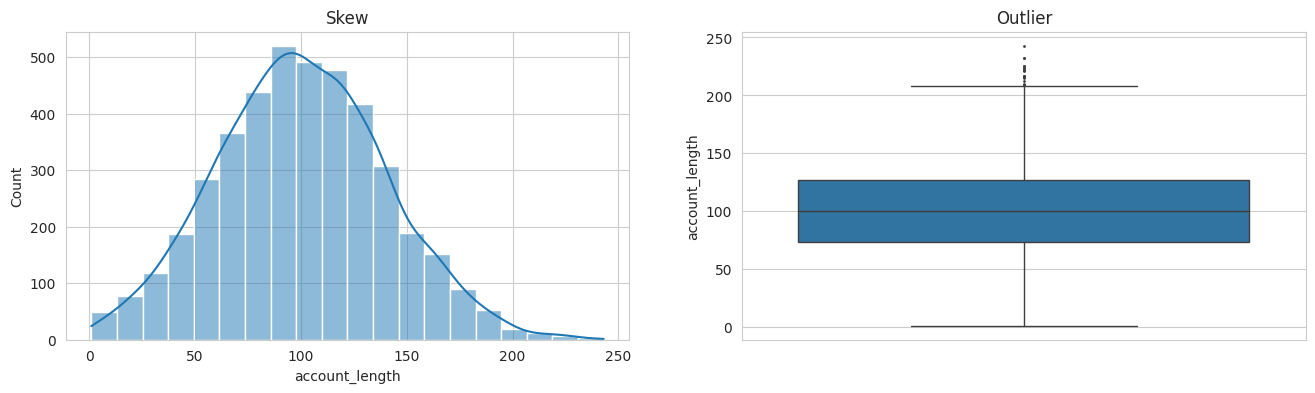

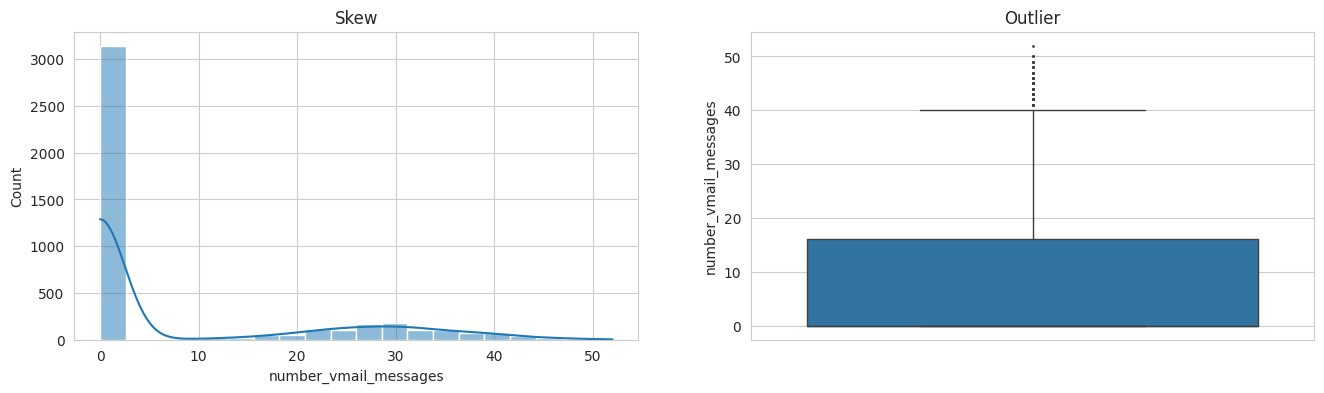

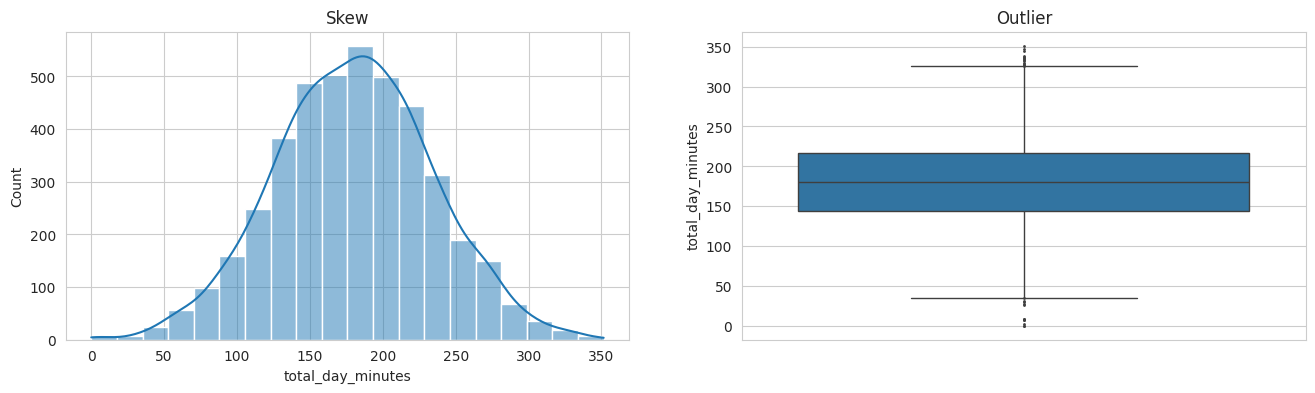

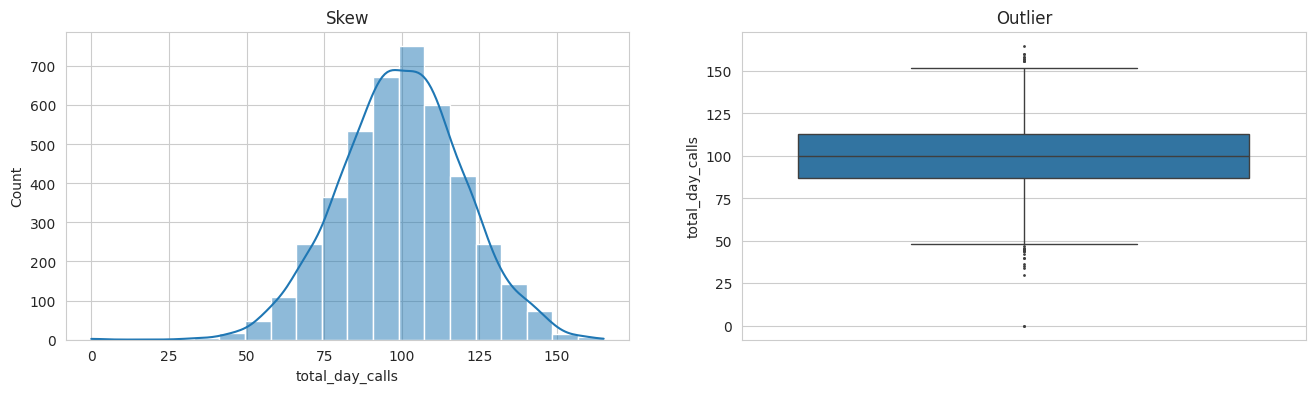

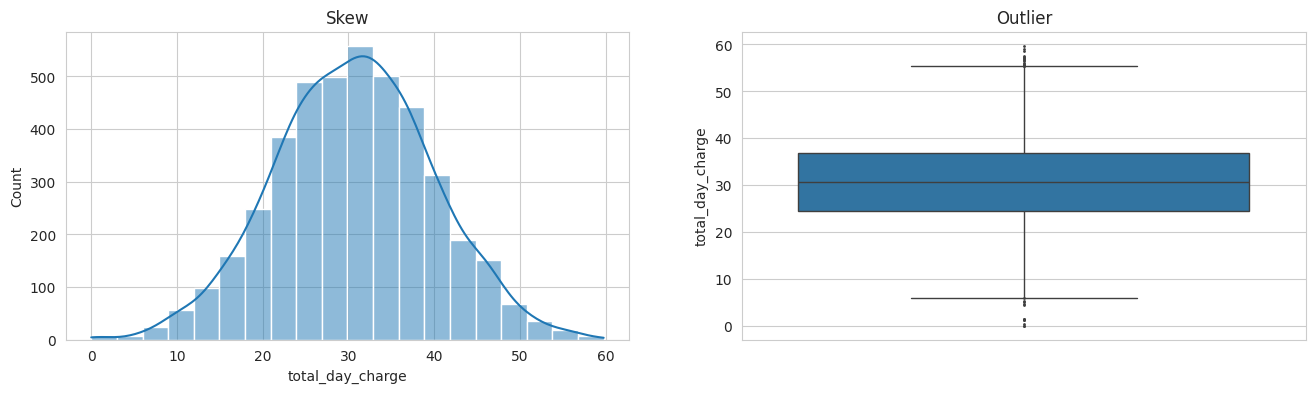

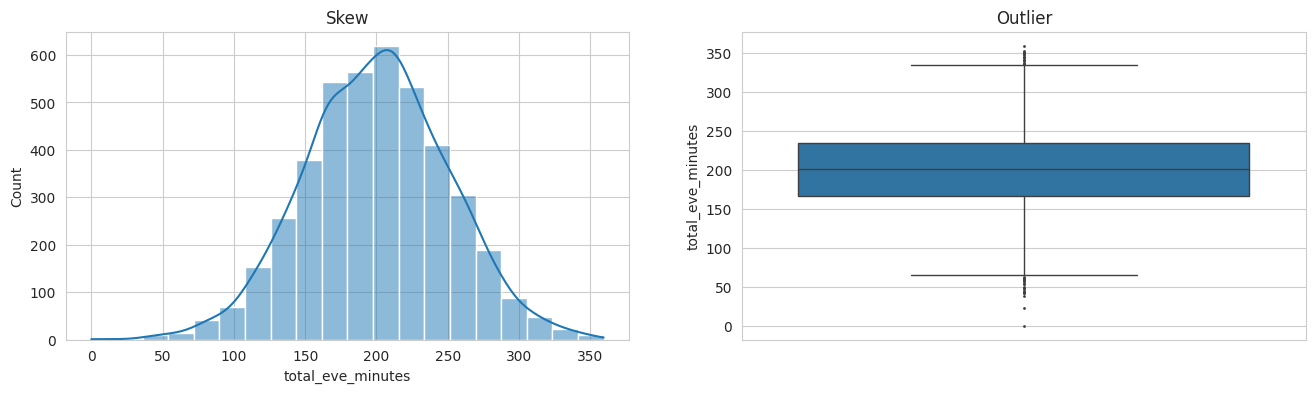

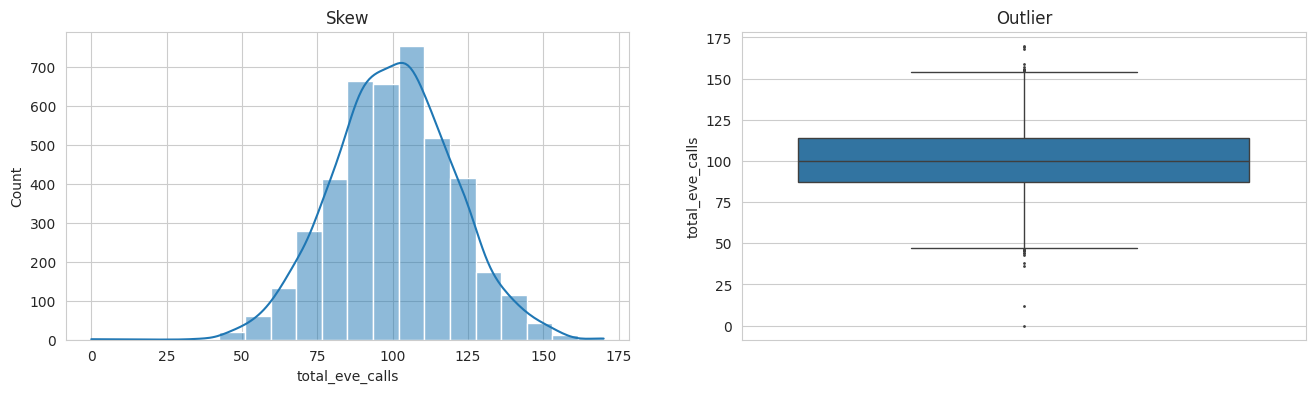

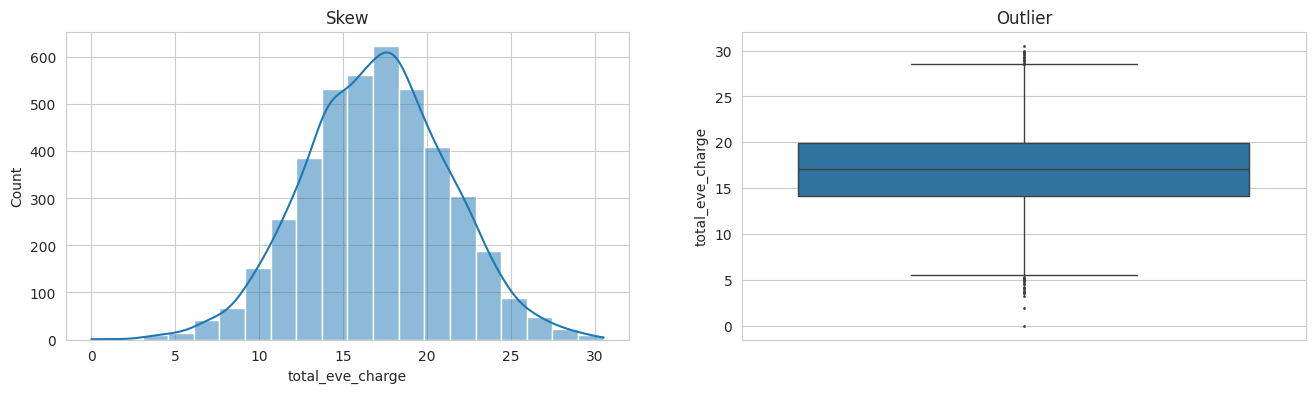

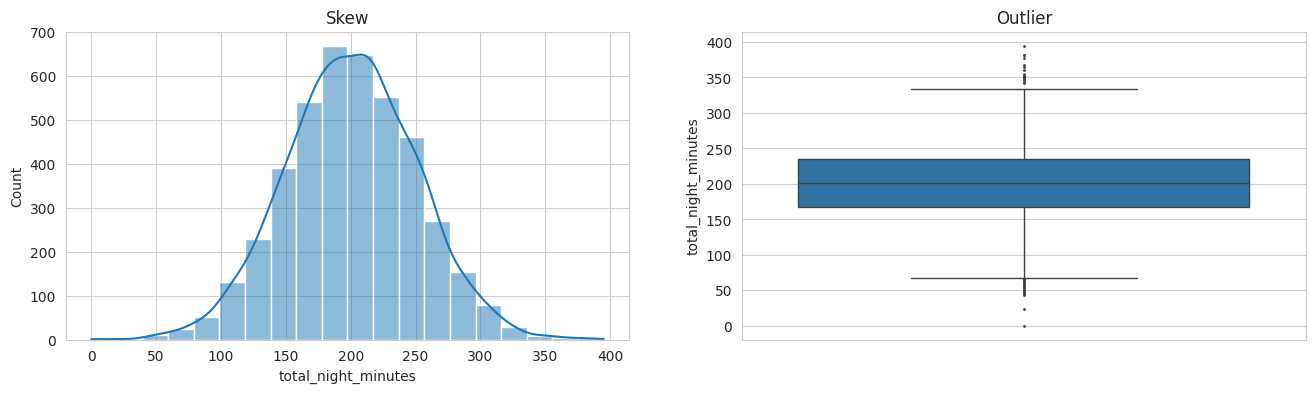

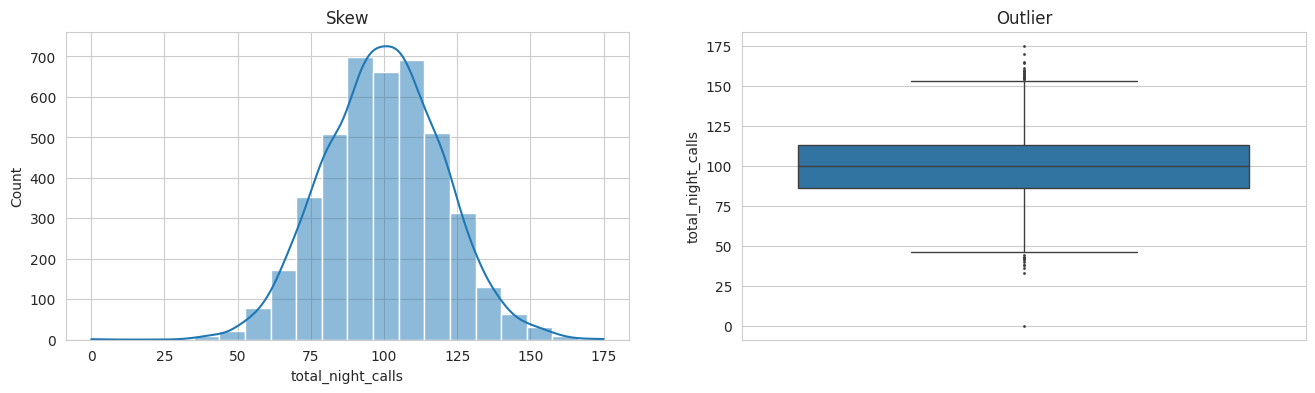

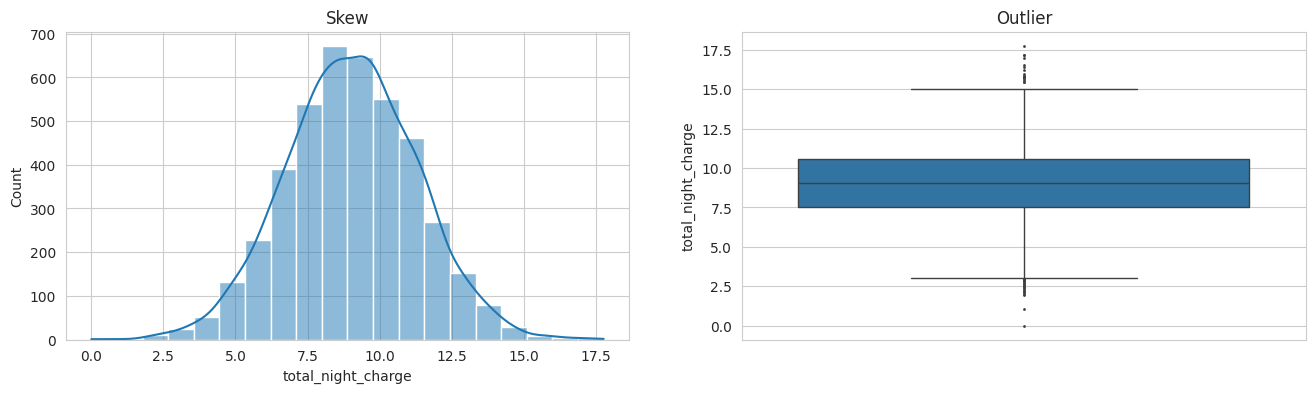

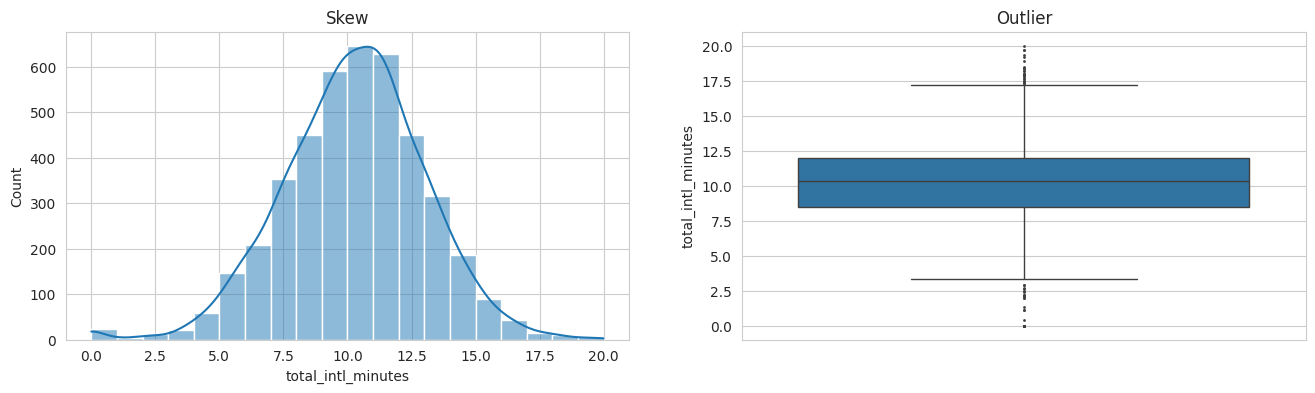

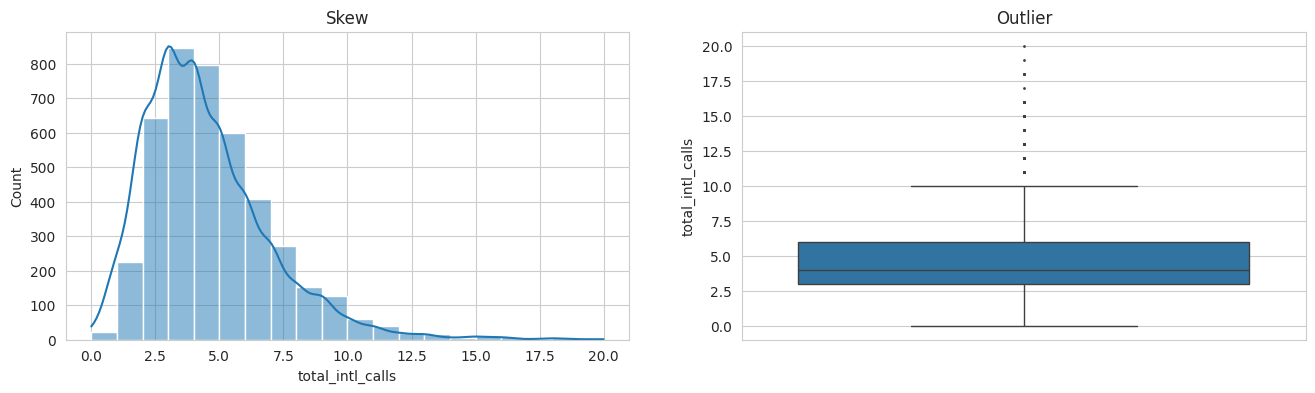

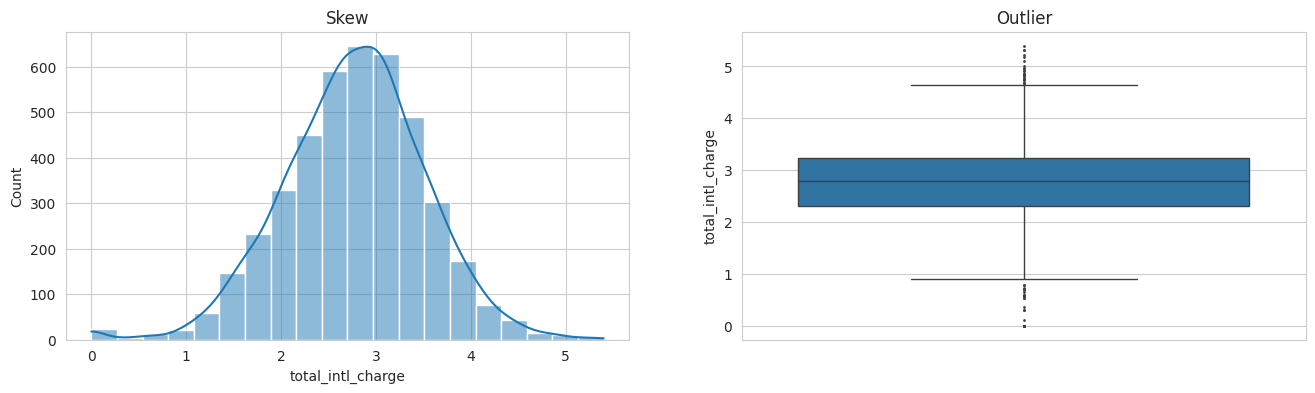

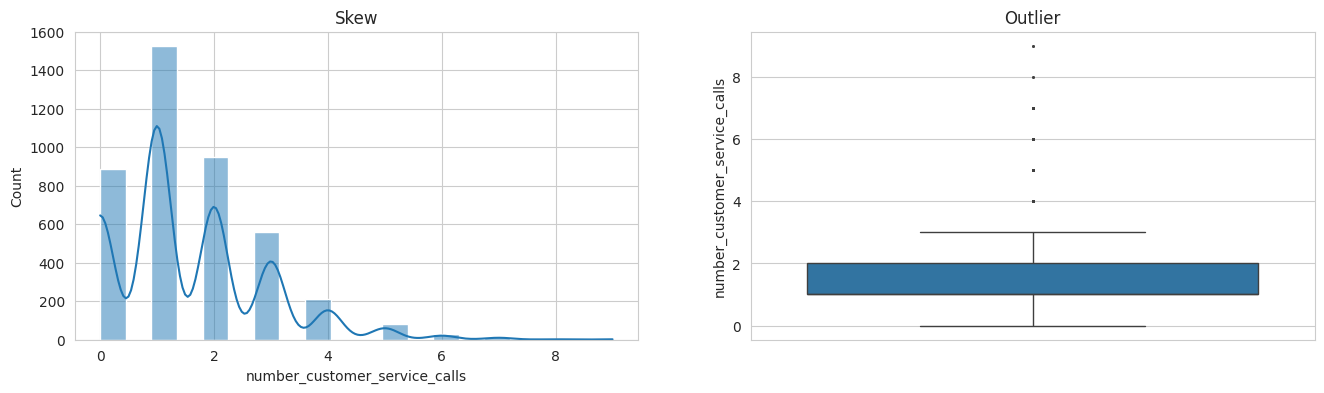

In [ ]:
for col in nums:
    fig, ax = plt.subplots(1,2, figsize=(16, 4))
    sns.histplot(df[col], bins=20, kde=True, ax=ax[0])
    ax[0].set_title('Skew')
    sns.boxplot(df[col], fliersize=1, ax=ax[1])
    ax[1].set_title('Outlier')

**Kolom distribusi normal:** ['total_day_minutes', 'total_day_charge', 'total_eve_minutes', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge']


**Kolom distribusi tidak normal:** ['account_length', 'number_vmail_messages', 'total_day_calls', 'total_eve_calls', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']

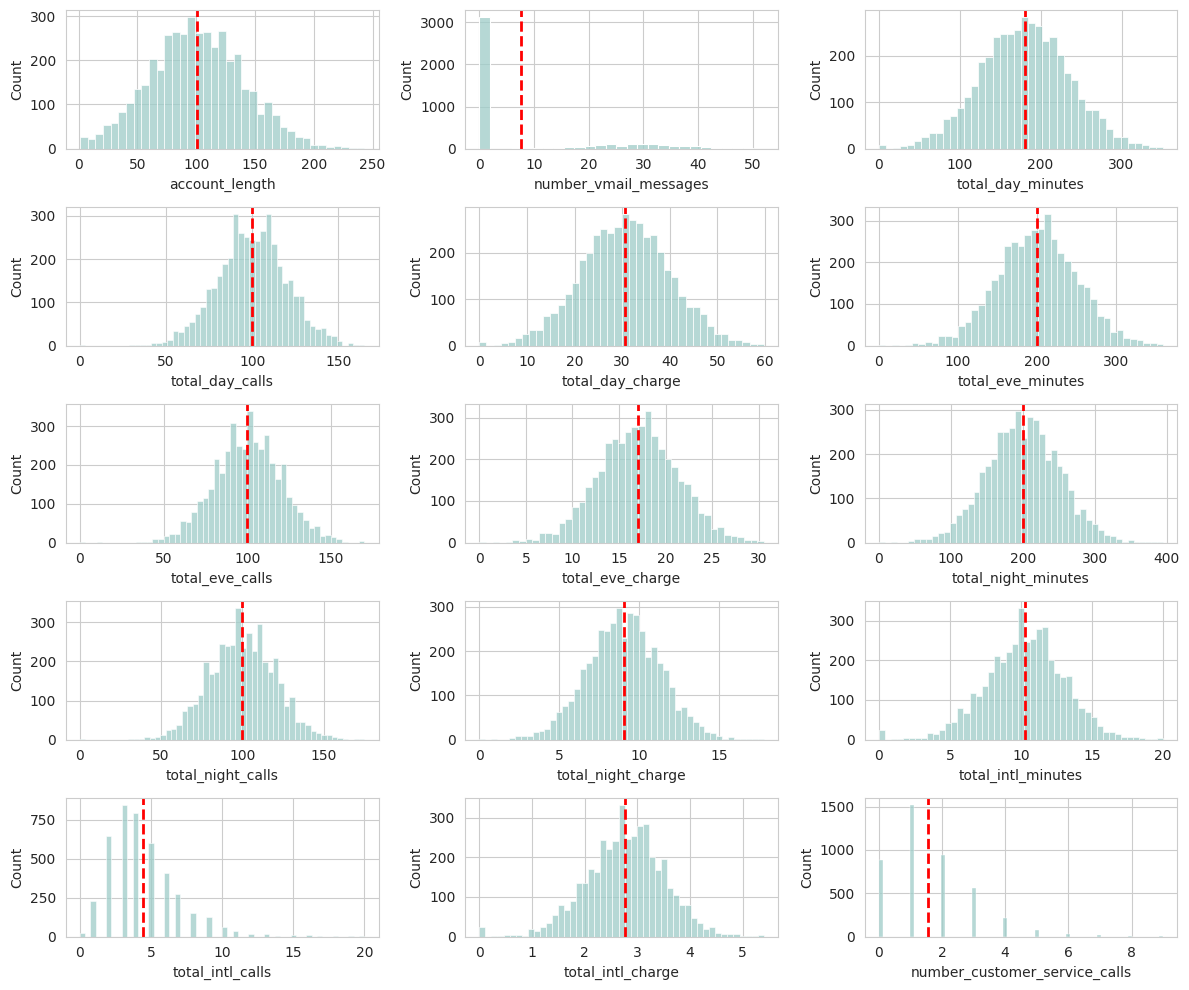

In [ ]:
color = '#9eccc8'
plt.rcParams['figure.figsize'] = (12, 10)

# Define numerical features and n
features = nums
n = 5

# Calculate the number of rows
num_rows = n
num_cols = math.ceil(len(features) / n)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols)

# Flatten the axes for easier iteration
axes = axes.flatten()

for i in range(0, len(features)):
    # Calculate average
    avg = df[features[i]].mean()

    # Plot histogram
    sns.histplot(x=df[features[i]], color=color, ax=axes[i])

    # Add average line
    axes[i].axvline(avg, color='red', linestyle='dashed', linewidth=2)

    # Set labels and layout
    axes[i].set_xlabel(features[i])
    plt.tight_layout()

plt.show()


### 2.2 Bivariate Analysis

#### 2.2.1 Categorical data

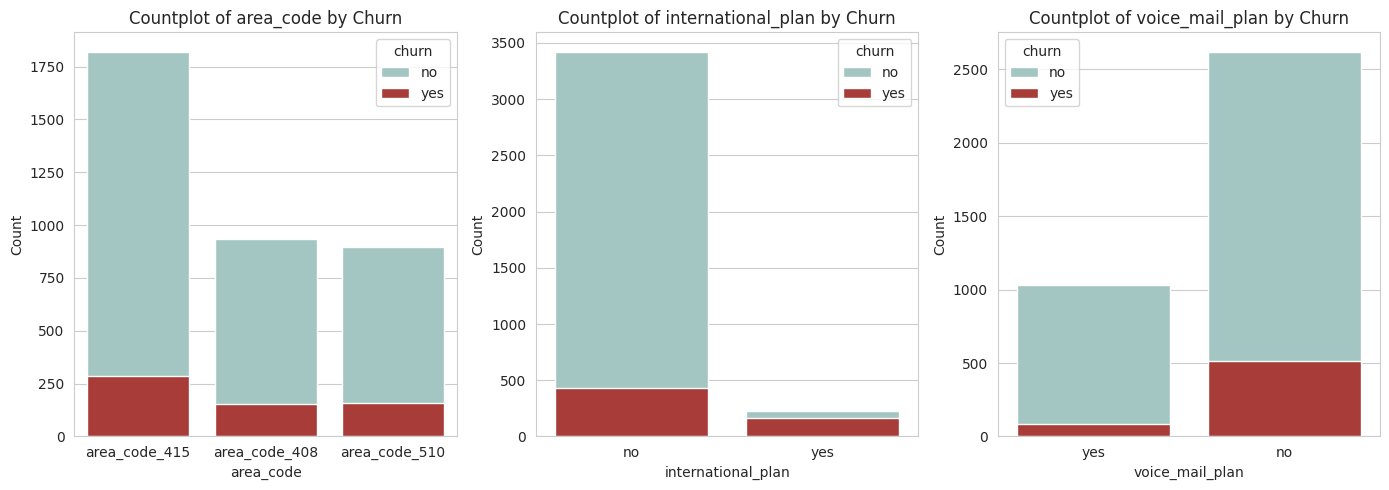

In [ ]:
cats = ['area_code', 'international_plan', 'voice_mail_plan']

color = '#9eccc8'

sns.set_style("whitegrid")

fig, axes = plt.subplots(1, len(cats), figsize=(14, 5))

for i, cat in enumerate(cats):
    sns.countplot(x=cat, hue='churn', data=df, ax=axes[i], palette=['#9eccc8', '#b92a27'], dodge=False)
    axes[i].set_title(f'Countplot of {cat} by Churn')
    axes[i].set_xlabel(cat)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


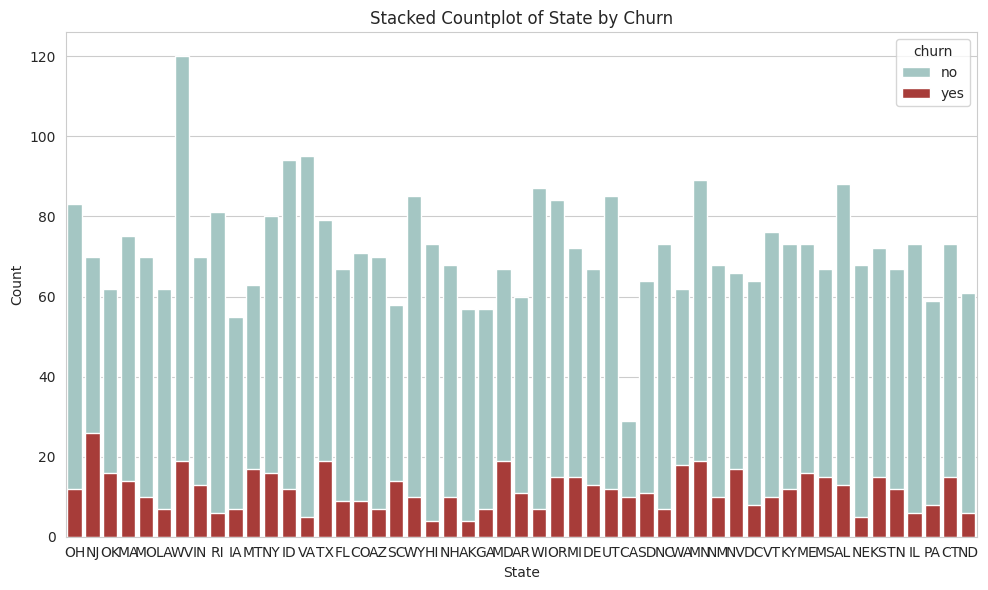

In [ ]:
color = '#9eccc8'

sns.set_style("whitegrid")

# Create countplot for the 'state' column stacked by 'churn'
plt.figure(figsize=(10, 6))
sns.countplot(x='state', hue='churn', data=df, palette=['#9eccc8', '#b92a27'], dodge=False)
plt.title('Stacked Countplot of State by Churn')
plt.xlabel('State')
plt.ylabel('Count')

# Show plot
plt.tight_layout()
plt.show()

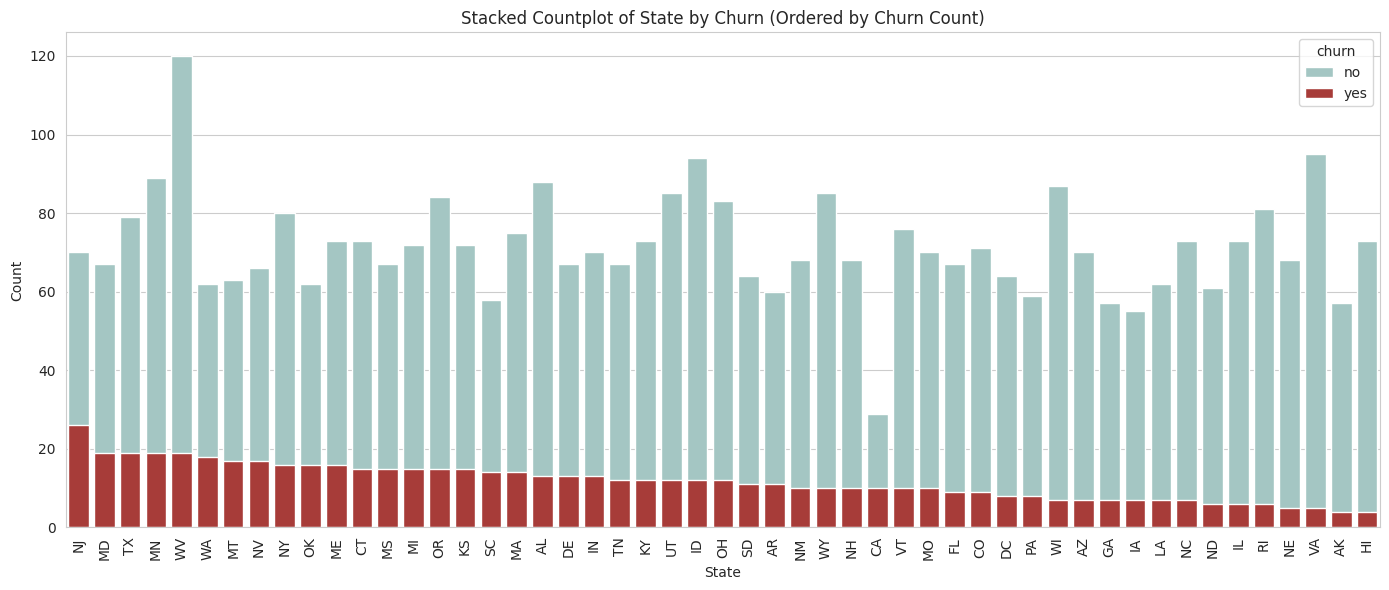

In [ ]:
# Calculate churn count for each state
churn_counts = df[df['churn'] == 'yes']['state'].value_counts().sort_values(ascending=False)

# Select the states with highest churn counts
highest_churn_states = churn_counts.index

color = '#9eccc8'

sns.set_style("whitegrid")

# Create countplot for the 'state' column stacked by 'churn'
plt.figure(figsize=(14, 6))
sns.countplot(x='state', hue='churn', data=df[df['state'].isin(highest_churn_states)],
              palette=['#9eccc8', '#b92a27'], dodge=False, order=highest_churn_states)
plt.title('Stacked Countplot of State by Churn (Ordered by Churn Count)')
plt.xlabel('State')
plt.ylabel('Count')

# Show plot
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


<ipython-input-20-121566d61f65>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='time_of_day', y='total_minutes', hue='churn', data=time_of_day_melted, estimator=sum, palette=['#9eccc8', '#b92a27'], ci=None, dodge=False)


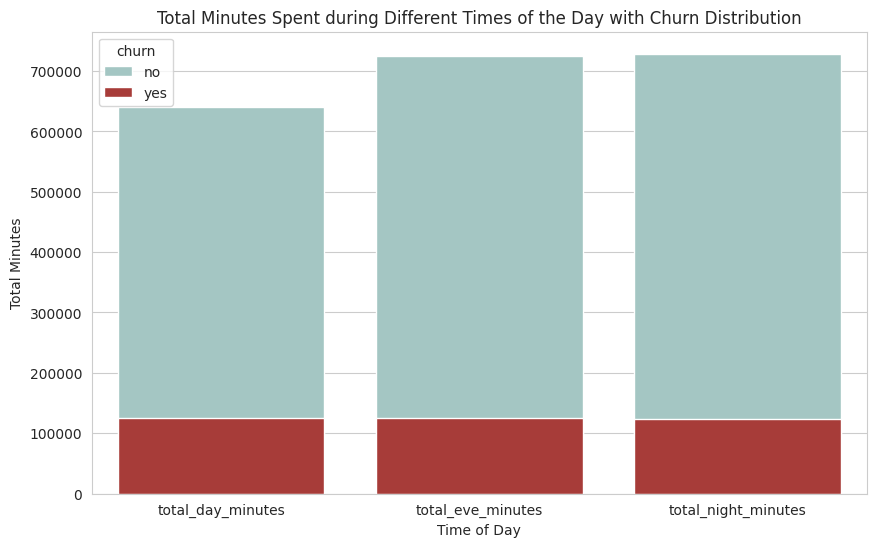

In [ ]:
# Create a new DataFrame with total minutes spent during different times of the day
time_of_day_df = df[['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'churn']].copy()


# Melt the DataFrame to plot total minutes against churn for each time period
time_of_day_melted = pd.melt(time_of_day_df, id_vars=['churn'], var_name='time_of_day', value_name='total_minutes')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='time_of_day', y='total_minutes', hue='churn', data=time_of_day_melted, estimator=sum, palette=['#9eccc8', '#b92a27'], ci=None, dodge=False)
plt.title('Total Minutes Spent during Different Times of the Day with Churn Distribution')
plt.xlabel('Time of Day')
plt.ylabel('Total Minutes')
plt.show()


#### 2.2.2 Numerical data

<ipython-input-21-073b919c066a>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[nums[i]], kde=True,  palette=['#9eccc8'], multiple='stack')
<ipython-input-21-073b919c066a>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[nums[i]], kde=True,  palette=['#9eccc8'], multiple='stack')
<ipython-input-21-073b919c066a>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[nums[i]], kde=True,  palette=['#9eccc8'], multiple='stack')
<ipython-input-21-073b919c066a>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[nums[i]], kde=True,  palette=['#9eccc8'], multiple='stack')
<ipython-input-21-073b919c066a>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[nums[i]], kde=True,  palette=['#9eccc8'], multiple='stack')
<ipython-input-21-073b919c066a>:5: UserWarning: Ig

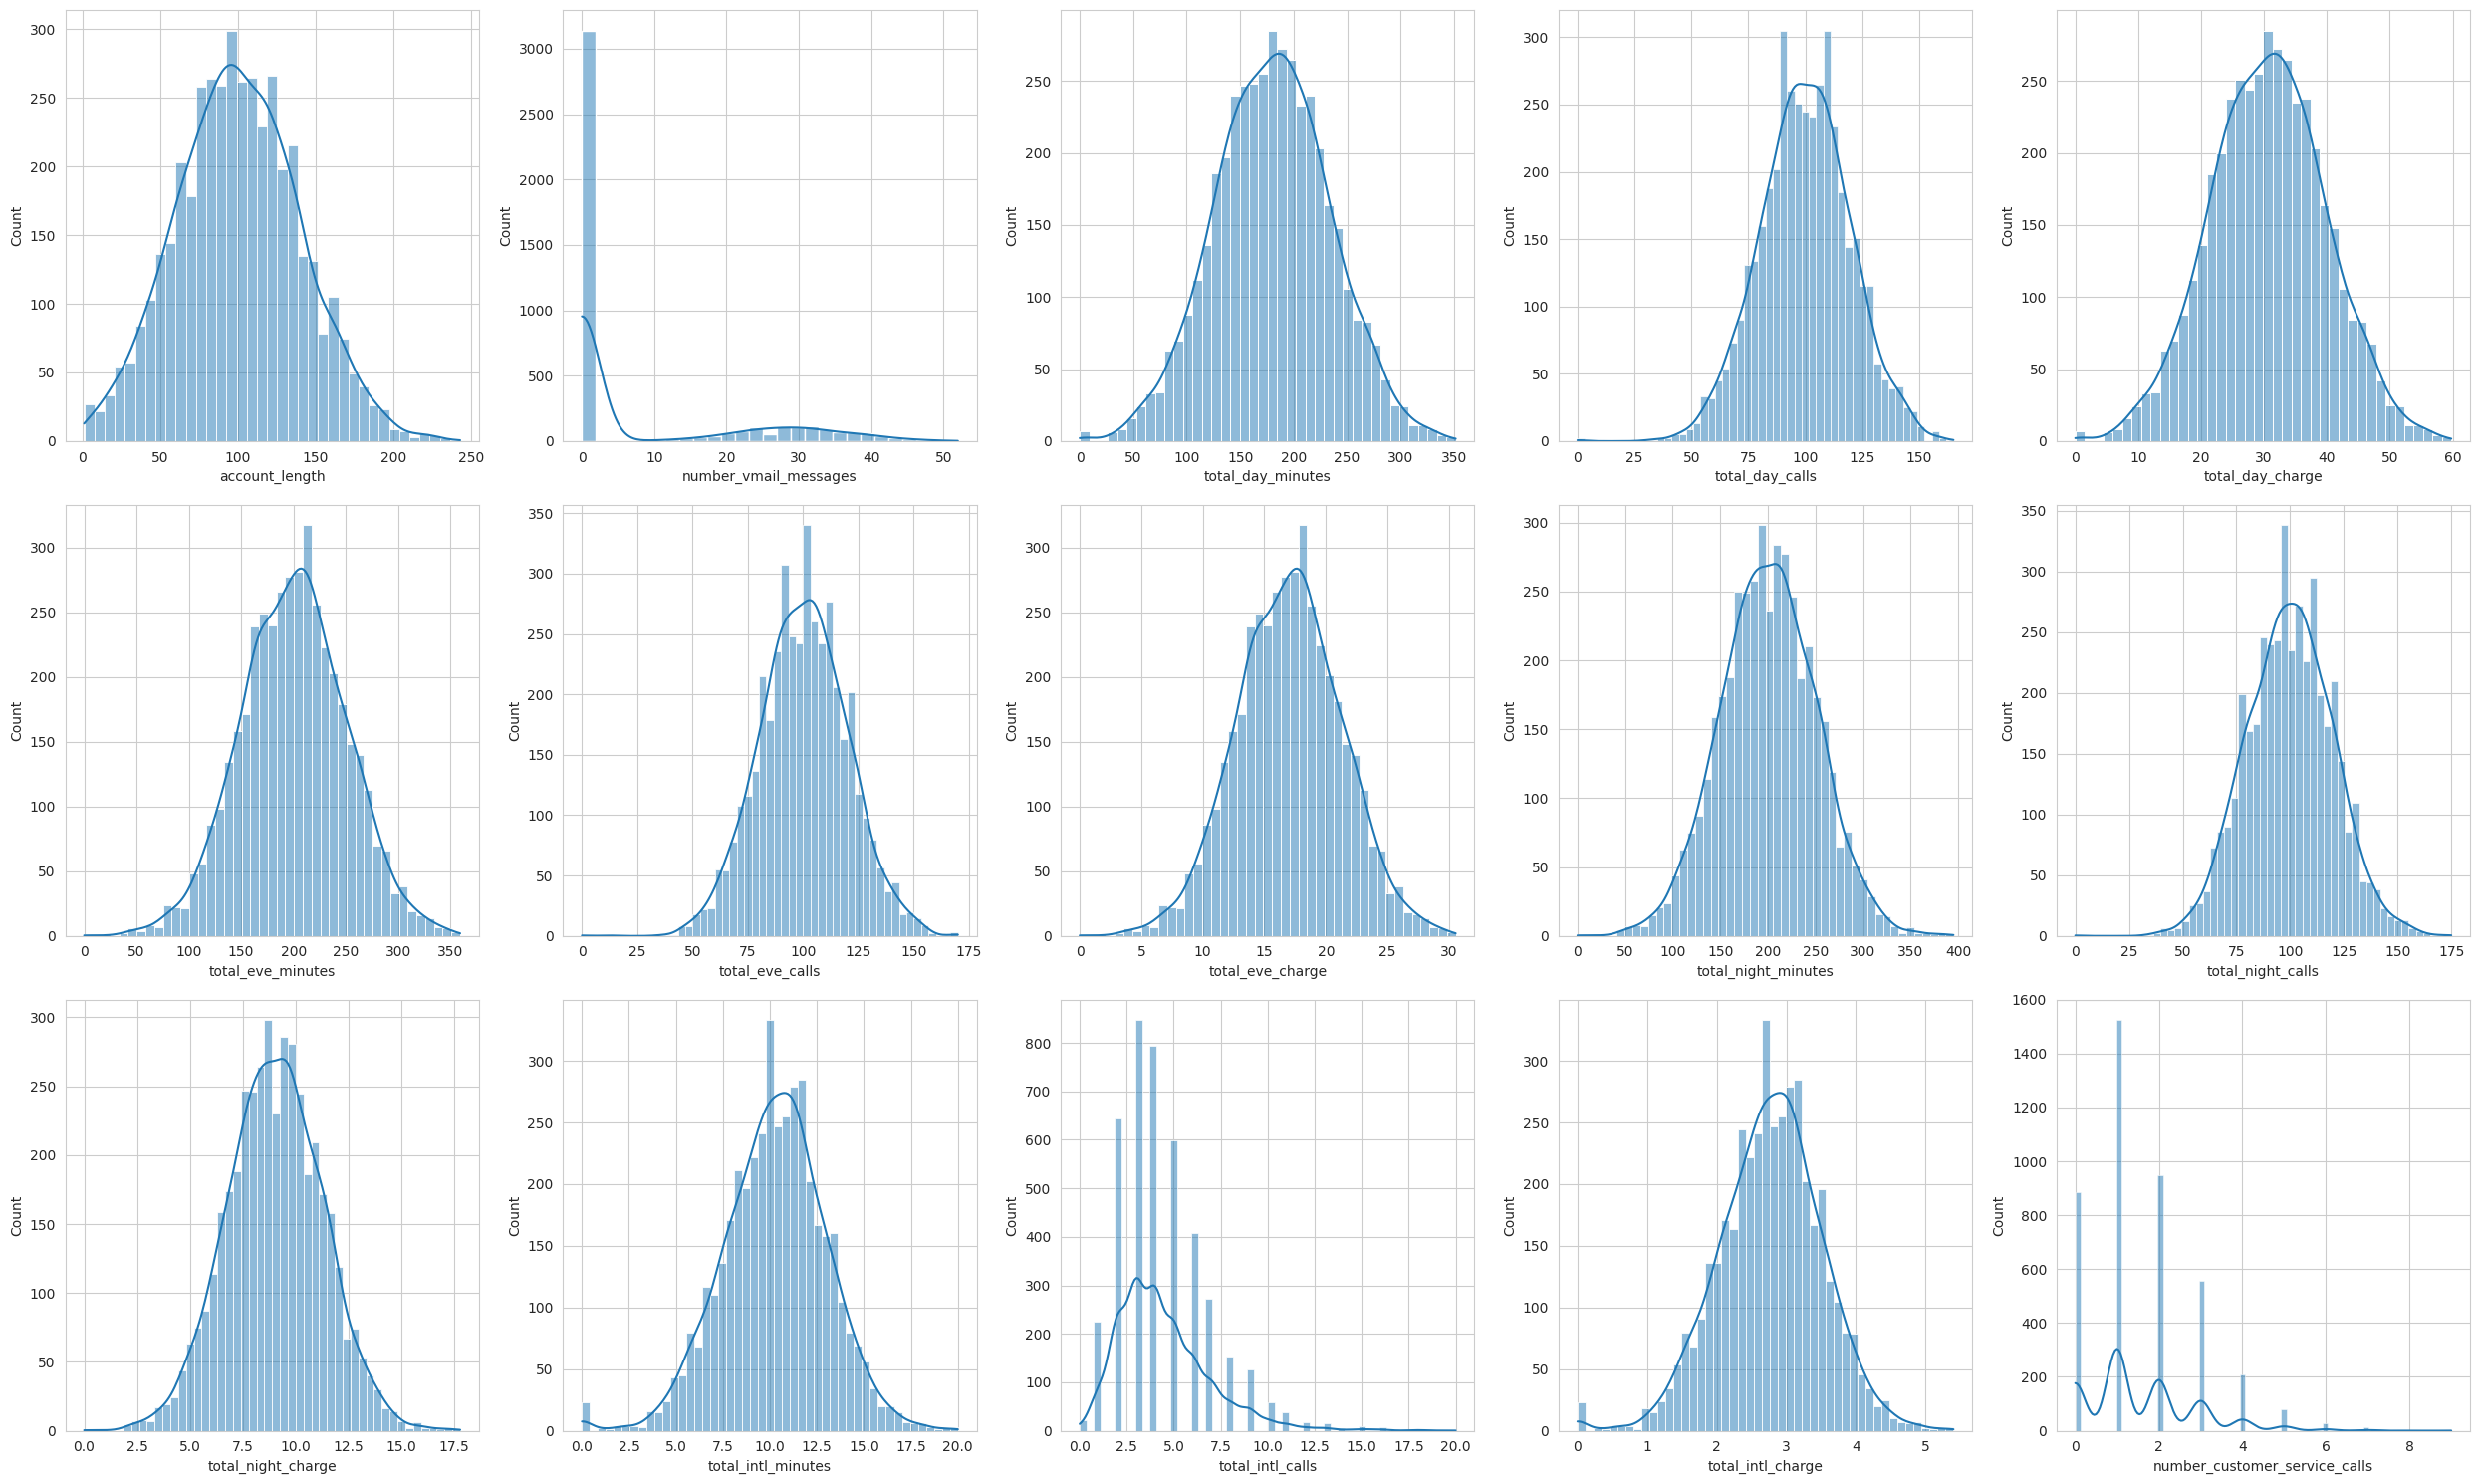

In [ ]:
plt.figure(figsize=(25, 15))
n=3
for i in range(0, len(nums)):
    plt.subplot(n, math.ceil(len(nums)/n), i+1)
    sns.histplot(df[nums[i]], kde=True,  palette=['#9eccc8'], multiple='stack')
    plt.tight_layout()

## 3. cek Outlier, cek Distribusi Normal, dan cek korelasi data

In [ ]:
print(f'Total rows: {len(df)}')
Kolom_numerik1 = ['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls']

outlier = []
no_outlier = []
is_outlier = []
low_lim = []
high_lim = []


filtered_entries = np.array([True] * len(df))
for col in Kolom_numerik1:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    #filter outlier
    filter_outlier = ((df[col] >= low_limit) & (df[col] <= high_limit))
    outlier.append(len(df[~filter_outlier]))
    no_outlier.append(len(df[filter_outlier]))
    is_outlier.append(df[col][~filter_outlier].any())
    low_lim.append(low_limit)
    high_lim.append(high_limit)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries

print("Outlier All Data :", len(df[~filtered_entries]))
print("Not Outlier All Data :", len(df[filtered_entries]))
print()

pd.DataFrame({
    "Column Name":Kolom_numerik1,
    "is Outlier": is_outlier,
    "Lower Limit": low_lim,
    "Upper Limit": high_lim,
    "Outlier":outlier,
    "No Outlier":no_outlier
})

Total rows: 4250
Outlier All Data : 735
Not Outlier All Data : 3515



,Column Name,is Outlier,Lower Limit,Upper Limit,Outlier,No Outlier
0,account_length,True,-8.00000,208.00000,20,4230
1,number_vmail_messages,True,-24.00000,40.00000,86,4164
2,total_day_minutes,True,34.01250,325.51250,25,4225
3,total_day_calls,True,48.00000,152.00000,28,4222
4,total_day_charge,True,5.78750,55.32750,26,4224
5,total_eve_minutes,True,64.15000,335.55000,34,4216
6,total_eve_calls,True,46.50000,154.50000,24,4226
7,total_eve_charge,True,5.45500,28.51500,34,4216
8,total_night_minutes,True,66.01250,335.91250,37,4213
9,total_night_calls,True,45.50000,153.50000,33,4217


In [ ]:
# Filter numeric columns from DataFrame
numeric_data = df[['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls']]

# Perform Shapiro-Wilk test for normality on each numeric column
shapiro_results = {}
for col in numeric_data.columns:
    shapiro_results[col] = stats.shapiro(numeric_data[col])

# Output results
for col, result in shapiro_results.items():
    print(f"{col}: p-value = {result.pvalue}, Is Normally Distributed? {result.pvalue > 0.05}")


account_length: p-value = 2.280265834997408e-05, Is Normally Distributed? False
number_vmail_messages: p-value = 0.0, Is Normally Distributed? False
total_day_minutes: p-value = 0.6013938784599304, Is Normally Distributed? True
total_day_calls: p-value = 0.0002208199875894934, Is Normally Distributed? False
total_day_charge: p-value = 0.602798581123352, Is Normally Distributed? True
total_eve_minutes: p-value = 0.5298635959625244, Is Normally Distributed? True
total_eve_calls: p-value = 0.01122624147683382, Is Normally Distributed? False
total_eve_charge: p-value = 0.5251765847206116, Is Normally Distributed? True
total_night_minutes: p-value = 0.7766871452331543, Is Normally Distributed? True
total_night_calls: p-value = 0.05320766940712929, Is Normally Distributed? True
total_night_charge: p-value = 0.7695860266685486, Is Normally Distributed? True
total_intl_minutes: p-value = 1.8736139755556186e-13, Is Normally Distributed? False
total_intl_calls: p-value = 0.0, Is Normally Distrib

In [ ]:
normal_columns = []
non_normal_columns = []

# Perform Shapiro-Wilk test for normality on each numeric column
for col in numeric_data.columns:
    p_value = stats.shapiro(numeric_data[col]).pvalue
    if p_value > 0.05:
        normal_columns.append(col)
    else:
        non_normal_columns.append(col)

# Output lists
print("Columns that are normally distributed:\n", normal_columns)
print("Columns that are not normally distributed\n:", non_normal_columns)

Columns that are normally distributed:
 ['total_day_minutes', 'total_day_charge', 'total_eve_minutes', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge']
Columns that are not normally distributed
: ['account_length', 'number_vmail_messages', 'total_day_calls', 'total_eve_calls', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


<Axes: >

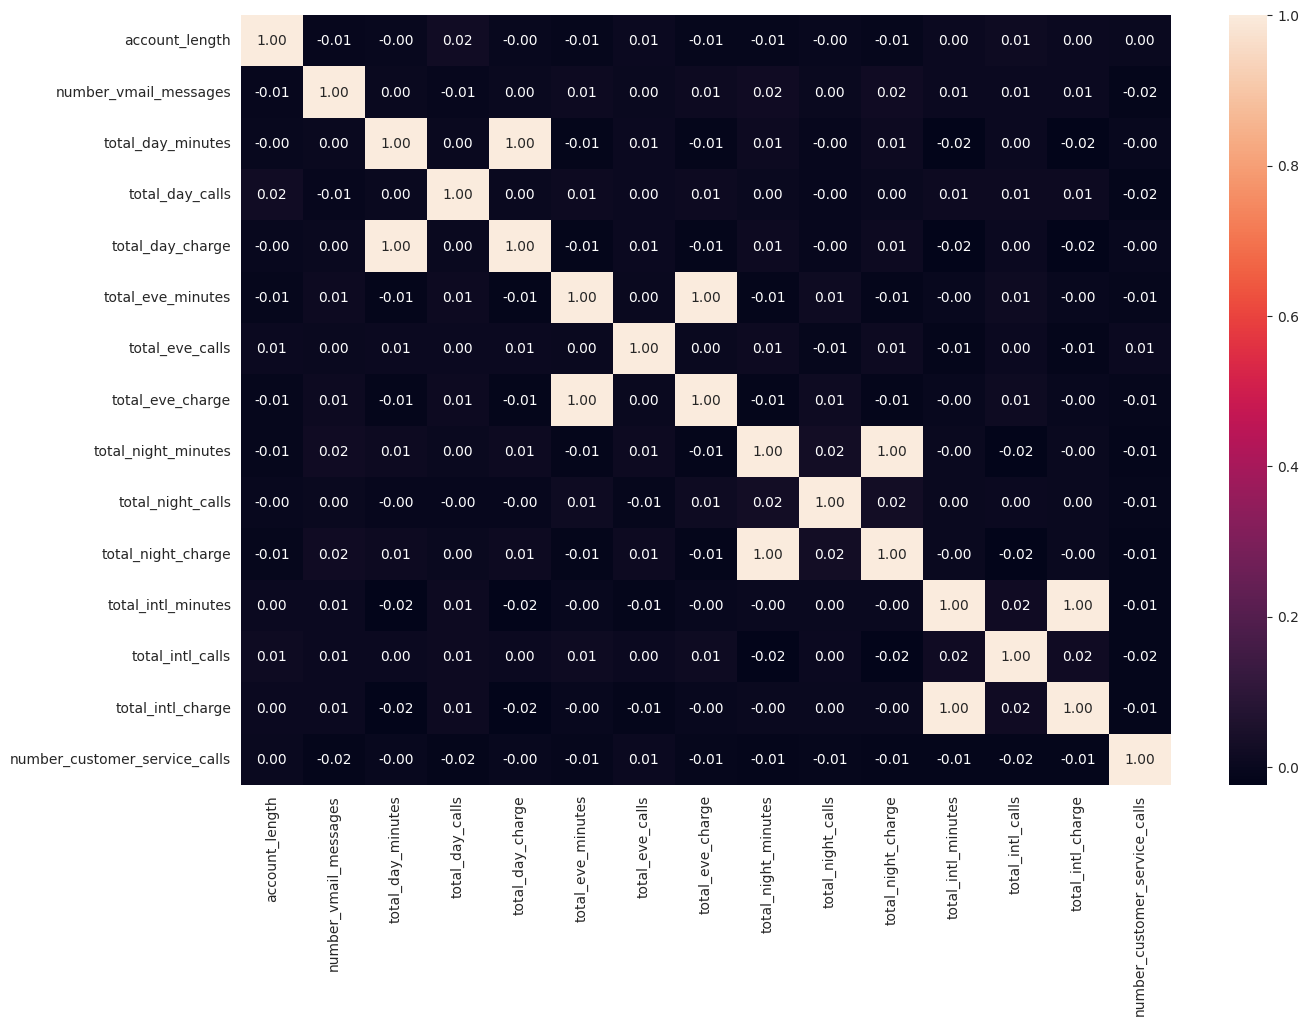

In [ ]:
# numerical
df_nums = df[nums]
plt.figure(figsize=(15,10))
sns.heatmap(df_nums.corr(), annot=True, fmt='.2f')

In [ ]:
# categorical
from scipy.stats import chi2_contingency
cats2 = ['state', 'area_code', 'international_plan', 'voice_mail_plan']
chi2_array, p_array = [], []
for column in cats2:

    crosstab = pd.crosstab(df[column], df['churn'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    chi2_array.append(chi2)
    p_array.append(p)

df_chi = pd.DataFrame({
    'Variable': cats2,
    'Chi-square': chi2_array,
    'p-value': p_array
})
df_chi.sort_values(by='Chi-square', ascending=False)

,Variable,Chi-square,p-value
2,international_plan,282.653490,1.983190e-63
0,state,85.993673,1.169028e-03
3,voice_mail_plan,55.109814,1.139804e-13
1,area_code,1.216654,5.442606e-01


**Insight:** menggunakan chi-square, untuk cek fitur dengan target. Fitur area_code akan dihapus dikarenakan memiliki p-value yang tinggi menandakan tidak ada hubungan yang baik dengan variabel lainnya.

# Preprocessing

## Feature Engineering

In [ ]:
df_fe = df.copy()
df_fe.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
df_fe['churn'] = df_fe['churn'].map({'yes': 1, 'no': 0})

<Axes: >

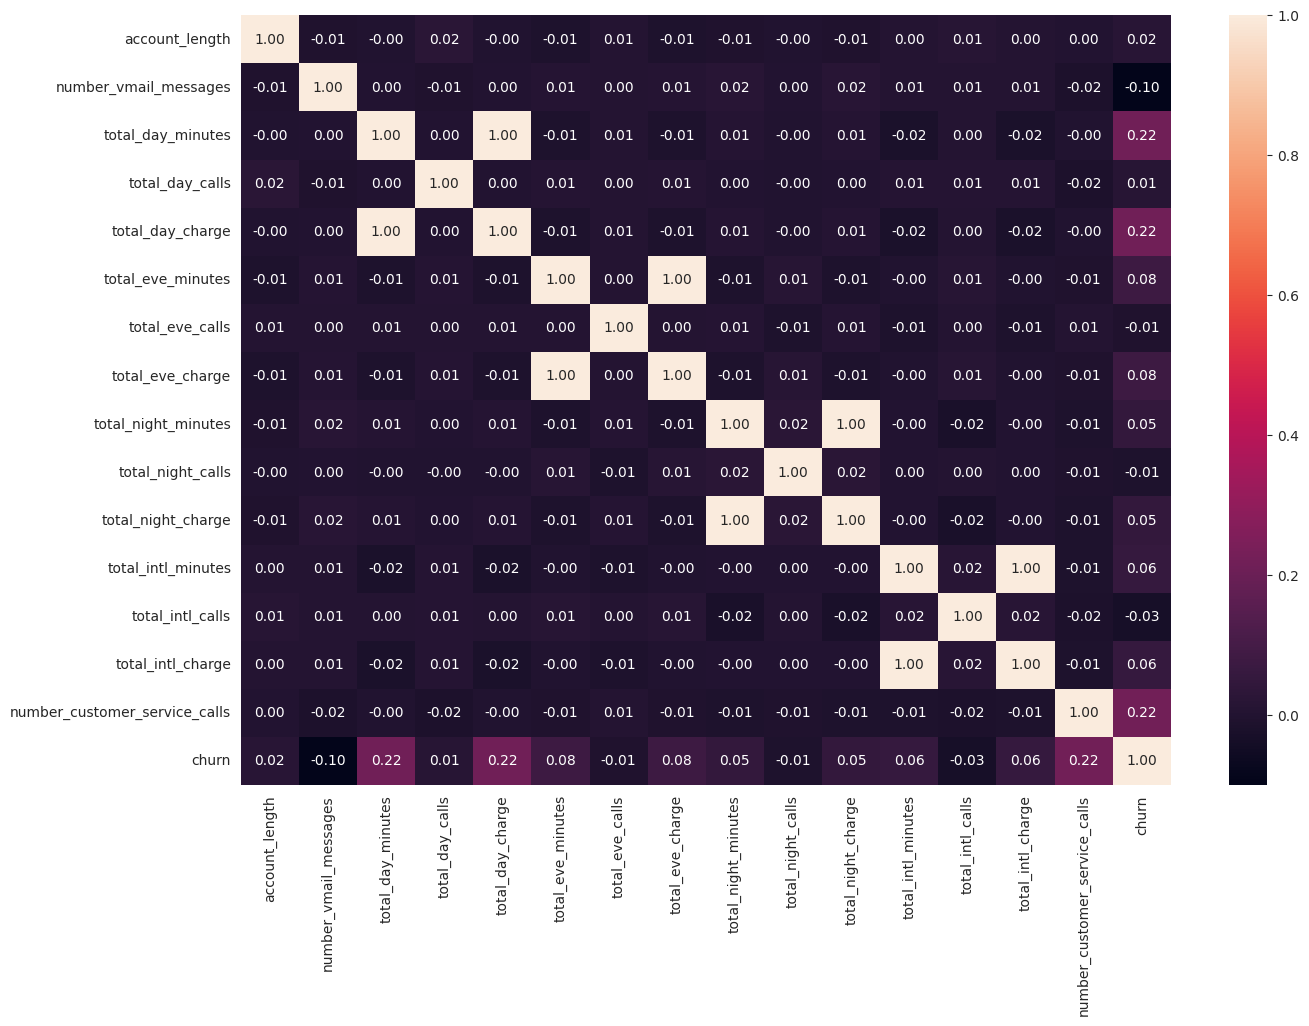

In [ ]:
# data numerik dari df_fe
df_fe_num = df_fe.select_dtypes(include='number')

plt.figure(figsize=(15,10))
sns.heatmap(df_fe_num.corr(), annot=True, fmt='.2f')

**insight:**
- korelasi tinggi dapat ditemukan antara total charge dan total minutes, oleh karena itu salah satu akan dihapus. kolom yang dihapus yaitu `total_day_minutes`, `total_eve_minutes`, `total_night_minutes`, dan `total_intl_minutes`.
- kolom `state` diputuskan akan di hapus karena memiliki banyak unique value yaitu 51, kolom ini tidak memiliki banyak informasi yang berguna.

In [ ]:
# drop kolom yang tidak dipakai
df_fe = df_fe.drop(columns=['state', 'total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes'])

In [ ]:
nums2 = ['account_length', 'number_vmail_messages',
       'total_day_calls', 'total_day_charge',
       'total_eve_calls', 'total_eve_charge',
       'total_night_calls', 'total_night_charge',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls']

normal1 = ['total_day_charge', 'total_eve_charge',
           'total_night_calls', 'total_night_charge']
non_normal1 = ['account_length', 'number_vmail_messages',
               'total_day_calls', 'total_eve_calls',
               'total_intl_calls',
               'total_intl_charge', 'number_customer_service_calls']

cats2 = ['area_code', 'international_plan', 'voice_mail_plan']

In [ ]:
# standar scaler
scaler = StandardScaler()

# transform data non normal
df_fe[non_normal1] = scaler.fit_transform(df_fe[non_normal1])

# minmax scaler
minmax = MinMaxScaler()

# transform data normal
df_fe[normal1] = minmax.fit_transform(df_fe[normal1])

# label encoder
label = LabelEncoder()

# label encoder untuk kolom churn
df_fe['churn'] = label.fit_transform(df_fe['churn'])

In [ ]:
# one hot encoder
ohe = OneHotEncoder()

# transform data kategorikal
ohe.fit(df_fe[cats2])

# transform data kategorikal
df_fe_ohe = ohe.transform(df_fe[cats2]).toarray()
df_fe_ohe = pd.DataFrame(df_fe_ohe, columns=ohe.get_feature_names_out(cats2))

# drop kolom kategorikal
df_fe = df_fe.drop(columns=cats2)

# gabungkan data kategorikal dan numerik
df_fe = pd.concat([df_fe, df_fe_ohe], axis=1)

In [ ]:
df_fe.head()

,account_length,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,0.170399,1.366857,1.163449,0.459672,0.141841,0.544204,0.588571,0.644344,-0.579164,1.248591,-0.426346,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.926186,-0.567911,0.710014,0.692436,0.493490,0.337263,0.594286,0.411930,0.232927,0.698342,-1.188960,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-0.409038,-0.567911,-1.456398,0.851740,-0.611691,0.172233,0.508571,0.498593,1.045017,-1.328187,0.336268,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,-0.635774,-0.567911,0.659633,0.474230,1.096316,0.412901,0.691429,0.473270,-0.579164,-0.053219,1.098882,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.523099,1.218029,-0.599910,0.620649,0.393019,0.969876,0.674286,0.538548,1.045017,-0.992669,1.098882,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [ ]:
# bagi data menjadi data train dan data test
X = df_fe.drop('churn', axis=1)
y = df_fe['churn']

In [ ]:
# balance data dengan SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

print(f'Jumlah data sebelum SMOTE: {len(X)}')
print(f'Jumlah data setelah SMOTE: {len(X_smote)}')
print(f'Jumlah data churn 0: {len(y_smote[y_smote == 0])}')
print(f'Jumlah data churn 1: {len(y_smote[y_smote == 1])}')

Jumlah data sebelum SMOTE: 4250
Jumlah data setelah SMOTE: 7304
Jumlah data churn 0: 3652
Jumlah data churn 1: 3652


In [ ]:
# bagi data menjadi data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [ ]:
print('Data train: ',X_train.shape, y_train.shape)

Data train:  (5843, 18) (5843,)


# Modeling

In [ ]:
# logistic regression
logreg = LogisticRegression()

# fit model
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# knn
knn = KNeighborsClassifier()

# fit model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# decision tree
tree = DecisionTreeClassifier()

# fit model
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# svm
svm = SVC()

# fit model
svm.fit(X_train, y_train)

SVC()

In [ ]:
# predict
y_pred_logreg = logreg.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_tree = tree.predict(X_test)
y_pred_svm = svm.predict(X_test)

In [ ]:
# akurasi
print('Akurasi Logistic Regression: ', accuracy_score(y_test, y_pred_logreg))
print('Akurasi KNN: ', accuracy_score(y_test, y_pred_knn))
print('Akurasi Decision Tree: ', accuracy_score(y_test, y_pred_tree))
print('Akurasi SVM: ', accuracy_score(y_test, y_pred_svm))

Akurasi Logistic Regression:  0.7878165639972622
Akurasi KNN:  0.865845311430527
Akurasi Decision Tree:  0.9021218343600274
Akurasi SVM:  0.8754277891854894


In [ ]:
# Evaluasi Model
print('Classification Report KNN: ')
print(classification_report(y_test, y_pred_knn))
print('Classification Report Decision Tree: ')
print(classification_report(y_test, y_pred_tree))
print('Classification Report SVM: ')
print(classification_report(y_test, y_pred_svm))

Classification Report KNN: 
              precision    recall  f1-score   support

           0       0.99      0.75      0.85       758
           1       0.79      0.99      0.88       703

    accuracy                           0.87      1461
   macro avg       0.89      0.87      0.86      1461
weighted avg       0.89      0.87      0.86      1461

Classification Report Decision Tree: 
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       758
           1       0.89      0.91      0.90       703

    accuracy                           0.90      1461
   macro avg       0.90      0.90      0.90      1461
weighted avg       0.90      0.90      0.90      1461

Classification Report SVM: 
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       758
           1       0.86      0.89      0.87       703

    accuracy                           0.88      1461
   macro avg       0.88      0.88 

In [ ]:
# Evaluasi logistic regression
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Mean Absolute Error Logistic Regression: {:.2f}'.format(mean_absolute_error(y_test, y_pred_logreg)))
print('Mean Squared Error Logistic Regression: {:.2f}'.format(mean_squared_error(y_test, y_pred_logreg)))
print('Root Mean Squared Error Logistic Regression: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_logreg))))

Mean Absolute Error Logistic Regression: 0.21
Mean Squared Error Logistic Regression: 0.21
Root Mean Squared Error Logistic Regression: 0.46


## Grid search

In [ ]:
# grid search
from sklearn.model_selection import GridSearchCV

In [ ]:
# grid knn
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metric
}

grid_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9]},
             scoring='accuracy')

In [ ]:
# grid decision tree
param_grid = {
    'criterion': ['gini', 'entropy'],  # Quality of split
    'max_depth': [3, 5, 7, 9],  # Maximum depth of the tree
}

grid_tree = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9]},
             scoring='accuracy')

In [ ]:
# grid logistic regression
param_grid = {
    'C': [0.1, 1, 10, 100],
}

grid_logreg = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_logreg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100]}, scoring='accuracy')

In [ ]:
# grid svm
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
}

grid_svm = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             scoring='accuracy')

## Predict using estimator

In [ ]:
best_knn = grid_knn.best_estimator_
best_tree = grid_tree.best_estimator_
best_logreg = grid_logreg.best_estimator_
best_svm = grid_svm.best_estimator_

In [ ]:
# KNN Tunning
knn_tun = best_knn.predict(X_test)
print('Akurasi KNN Tunning: ', accuracy_score(y_test, knn_tun))
print('Classification Report KNN Tunning: ')
print(classification_report(y_test, knn_tun))

Akurasi KNN Tunning:  0.8980150581793293
Classification Report KNN Tunning: 
              precision    recall  f1-score   support

           0       0.99      0.81      0.89       758
           1       0.83      0.99      0.90       703

    accuracy                           0.90      1461
   macro avg       0.91      0.90      0.90      1461
weighted avg       0.91      0.90      0.90      1461



In [ ]:
# Decision Tree Tunning
tree_tun = best_tree.predict(X_test)
print('Akurasi Decision Tree Tunning: ', accuracy_score(y_test, tree_tun))
print('Classification Report Decision Tree Tunning: ')
print(classification_report(y_test, tree_tun))

Akurasi Decision Tree Tunning:  0.893908281998631
Classification Report Decision Tree Tunning: 
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       758
           1       0.96      0.81      0.88       703

    accuracy                           0.89      1461
   macro avg       0.90      0.89      0.89      1461
weighted avg       0.90      0.89      0.89      1461



In [ ]:
# Logistic Regression Tunning
logreg_tun = best_logreg.predict(X_test)
print('Akurasi Logistic Regression Tunning: ', accuracy_score(y_test, logreg_tun))
# mse, mae, rmse
print('Mean Absolute Error Logistic Regression Tunning: ', mean_absolute_error(y_test, logreg_tun))
print('Mean Squared Error Logistic Regression Tunning: ', mean_squared_error(y_test, logreg_tun))
print('Root Mean Squared Error Logistic Regression Tunning: ', np.sqrt(mean_squared_error(y_test, logreg_tun))
)

Akurasi Logistic Regression Tunning:  0.7878165639972622
Mean Absolute Error Logistic Regression Tunning:  0.21218343600273784
Mean Squared Error Logistic Regression Tunning:  0.21218343600273784
Root Mean Squared Error Logistic Regression Tunning:  0.4606337330273781


In [ ]:
# SVM Tunning
svm_tun = best_svm.predict(X_test)
print('Akurasi SVM Tunning: ', accuracy_score(y_test, svm_tun))
print('Classification Report SVM Tunning: ')
print(classification_report(y_test, svm_tun))

Akurasi SVM Tunning:  0.973990417522245
Classification Report SVM Tunning: 
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       758
           1       0.96      0.99      0.97       703

    accuracy                           0.97      1461
   macro avg       0.97      0.97      0.97      1461
weighted avg       0.97      0.97      0.97      1461



# Testing predict

In [ ]:
df_test = pd.read_csv('Data Test.csv')
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [ ]:
# hapus kolom yang tidak dipakai
df_test = df_test.drop(columns=['id','state', 'total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes'])

In [ ]:
df_test.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls
0,128,area_code_415,no,yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1
1,118,area_code_510,yes,no,0,98,37.98,101,18.75,118,9.18,6,1.70,0
2,62,area_code_415,no,no,0,70,20.52,76,26.11,99,9.14,6,3.54,4
3,93,area_code_510,no,no,0,114,32.42,111,18.55,121,5.83,3,2.19,3
4,174,area_code_415,no,no,0,76,21.13,112,23.55,115,11.28,5,4.19,3


In [ ]:
numstest2 = ['account_length', 'number_vmail_messages',
       'total_day_calls', 'total_day_charge',
       'total_eve_calls', 'total_eve_charge',
       'total_night_calls', 'total_night_charge',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls']

normaltest1 = ['total_day_charge', 'total_eve_charge',
           'total_night_calls', 'total_night_charge']
non_normaltest1 = ['account_length', 'number_vmail_messages',
               'total_day_calls', 'total_eve_calls',
               'total_intl_calls',
               'total_intl_charge', 'number_customer_service_calls']

catstest2 = ['area_code', 'international_plan', 'voice_mail_plan']

In [ ]:
# standar scaler
scaler = StandardScaler()

# transform data non normal
df_test[non_normaltest1] = scaler.fit_transform(df_test[non_normaltest1])

# minmax scaler
minmax = MinMaxScaler()

# transform data normal
df_test[normaltest1] = minmax.fit_transform(df_test[normaltest1])

In [ ]:
# one hot encoder
ohe = OneHotEncoder()

# transform data kategorikal
ohe.fit(df_test[catstest2])

# transform data kategorikal
df_fe_ohe = ohe.transform(df_test[catstest2]).toarray()
df_fe_ohe = pd.DataFrame(df_fe_ohe, columns=ohe.get_feature_names_out(catstest2))

# drop kolom kategorikal
df_test = df_test.drop(columns=catstest2)

# gabungkan data kategorikal dan numerik
df_test = pd.concat([df_test, df_fe_ohe], axis=1)

In [ ]:
df_test.head()

,account_length,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,0.696065,1.172240,0.470870,0.746653,-0.065790,0.500000,0.506410,0.618440,-0.613702,-0.106976,-0.497639,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.444001,-0.599015,-0.138101,0.623370,0.037545,0.569710,0.679487,0.488652,0.625821,-1.445297,-1.281734,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,-0.967554,-0.599015,-1.559032,0.319770,-1.254136,0.830149,0.557692,0.485816,0.625821,1.017213,1.854646,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.186157,-0.599015,0.673860,0.526691,0.554217,0.562633,0.698718,0.251064,-0.613702,-0.789520,1.070551,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,1.855557,-0.599015,-1.254547,0.330377,0.605885,0.739561,0.660256,0.637589,0.212647,1.887122,1.070551,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
# svm
y_pred_svm = best_svm.predict(df_test)

# simpan hasil prediksi
df_test['churn'] = y_pred_svm

In [ ]:
df_test.head(5)

,account_length,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes,churn
0,0.696065,1.172240,0.470870,0.746653,-0.065790,0.500000,0.506410,0.618440,-0.613702,-0.106976,-0.497639,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0
1,0.444001,-0.599015,-0.138101,0.623370,0.037545,0.569710,0.679487,0.488652,0.625821,-1.445297,-1.281734,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0
2,-0.967554,-0.599015,-1.559032,0.319770,-1.254136,0.830149,0.557692,0.485816,0.625821,1.017213,1.854646,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
3,-0.186157,-0.599015,0.673860,0.526691,0.554217,0.562633,0.698718,0.251064,-0.613702,-0.789520,1.070551,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0
4,1.855557,-0.599015,-1.254547,0.330377,0.605885,0.739561,0.660256,0.637589,0.212647,1.887122,1.070551,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0


In [ ]:
# save to csv dengan mengambil
df_test.to_csv('hasil_prediksi.csv', index=False)

# Business Insight

In [ ]:
best_svm.kernel

'rbf'

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
X_train.columns

Index(['account_length', 'number_vmail_messages', 'total_day_calls',
       'total_day_charge', 'total_eve_calls', 'total_eve_charge',
       'total_night_calls', 'total_night_charge', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls',
       'area_code_area_code_408', 'area_code_area_code_415',
       'area_code_area_code_510', 'international_plan_no',
       'international_plan_yes', 'voice_mail_plan_no', 'voice_mail_plan_yes'],
      dtype='object')

In [ ]:
result = permutation_importance(best_svm, X_test, y_test, n_repeats=10, random_state=42)

for i in result.importances_mean.argsort()[::-1]:
    print(f"Feature {i}: Importance {result.importances_mean[i]}")

Feature 10: Importance 0.22409308692676247
Feature 9: Importance 0.18596851471594797
Feature 2: Importance 0.18480492813141686
Feature 0: Importance 0.17857631759069129
Feature 8: Importance 0.17508555783709787
Feature 4: Importance 0.16666666666666666
Feature 1: Importance 0.13230663928815875
Feature 14: Importance 0.050581793292265566
Feature 15: Importance 0.050581793292265566
Feature 12: Importance 0.04818617385352497
Feature 11: Importance 0.03634496919917864
Feature 13: Importance 0.03477070499657766
Feature 16: Importance 0.034496919917864445
Feature 17: Importance 0.034496919917864445
Feature 3: Importance 0.030800821355236107
Feature 7: Importance 0.0044490075290896216
Feature 6: Importance 0.0019164955509924475
Feature 5: Importance 0.0015058179329226374


In [ ]:
feature_names = ['account_length', 'number_vmail_messages', 'total_day_calls',
       'total_day_charge', 'total_eve_calls', 'total_eve_charge',
       'total_night_calls', 'total_night_charge', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls',
       'area_code_area_code_408', 'area_code_area_code_415',
       'area_code_area_code_510', 'international_plan_no',
       'international_plan_yes', 'voice_mail_plan_no', 'voice_mail_plan_yes']

for i in result.importances_mean.argsort()[::-1]:
    print(f"Feature {feature_names[i]}: Importance {result.importances_mean[i]}")

Feature number_customer_service_calls: Importance 0.22409308692676247
Feature total_intl_charge: Importance 0.18596851471594797
Feature total_day_calls: Importance 0.18480492813141686
Feature account_length: Importance 0.17857631759069129
Feature total_intl_calls: Importance 0.17508555783709787
Feature total_eve_calls: Importance 0.16666666666666666
Feature number_vmail_messages: Importance 0.13230663928815875
Feature international_plan_no: Importance 0.050581793292265566
Feature international_plan_yes: Importance 0.050581793292265566
Feature area_code_area_code_415: Importance 0.04818617385352497
Feature area_code_area_code_408: Importance 0.03634496919917864
Feature area_code_area_code_510: Importance 0.03477070499657766
Feature voice_mail_plan_no: Importance 0.034496919917864445
Feature voice_mail_plan_yes: Importance 0.034496919917864445
Feature total_day_charge: Importance 0.030800821355236107
Feature total_night_charge: Importance 0.0044490075290896216
Feature total_night_calls: 

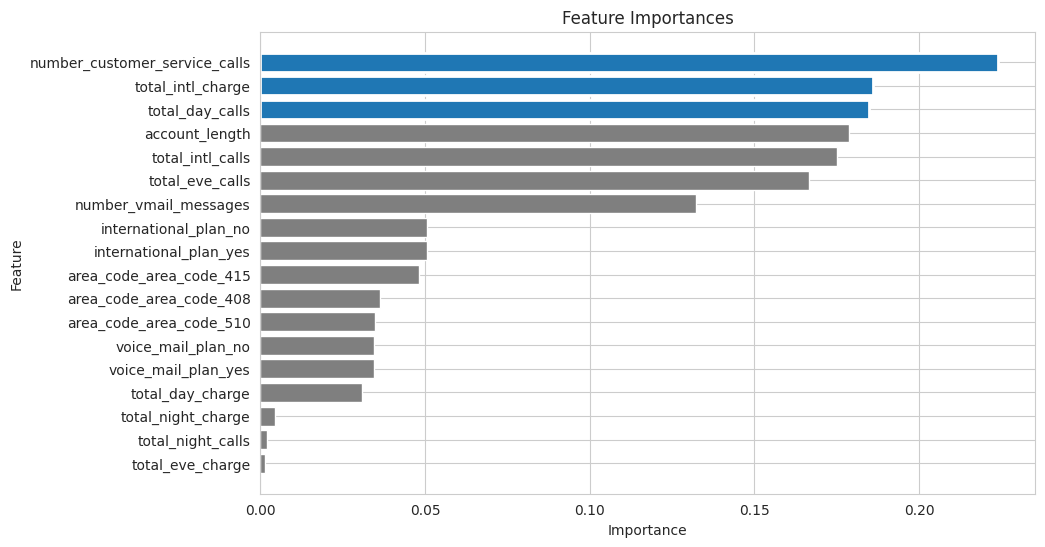

In [ ]:
import matplotlib.pyplot as plt

sorted_indices = result.importances_mean.argsort()

num_top_features = 3
colors = ['tab:blue' if i >= len(feature_names) - num_top_features else 'tab:gray' for i in range(len(feature_names))]

plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(feature_names)), result.importances_mean[sorted_indices], color=colors)

plt.yticks(range(len(feature_names)), [feature_names[i] for i in sorted_indices])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')

for i in range(len(feature_names) - num_top_features, len(feature_names)):
    bars[i].set_linewidth(2)

plt.show()


Berdasarkan Feature importance, terdapat 5 kolom dengan value tertinggi sesuai, yaitu :    
- `number_customer_service_calls`
- `total_intl_charge`
- `total_day_calls`
- `account_length`
- `total_intl_calls`

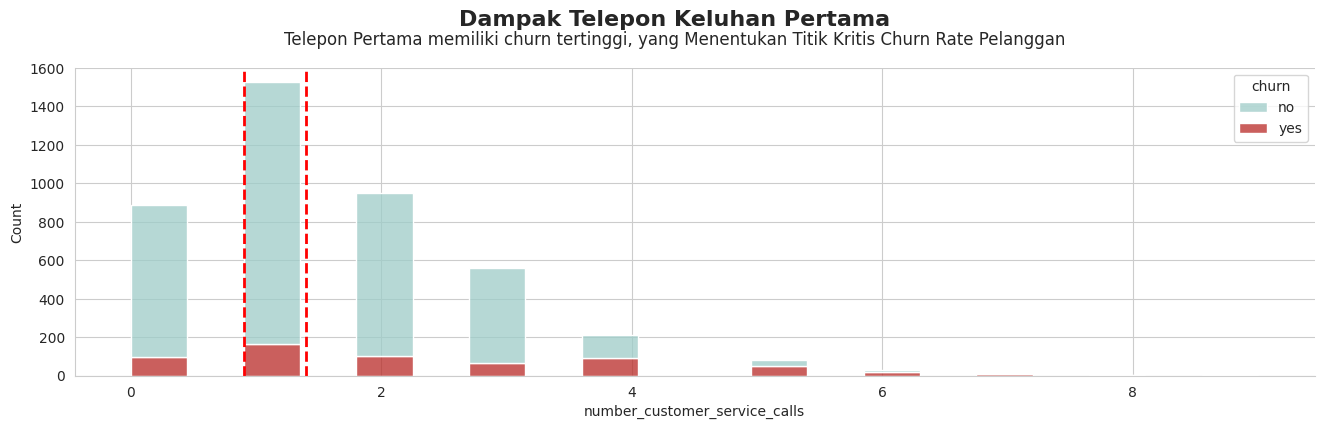

In [ ]:
fig, ax = plt.subplots(figsize=(16, 4))

sns.histplot(df, x='number_customer_service_calls', bins=20, hue='churn', palette=['#9eccc8', '#b92a27'], multiple='stack', ax=ax)
max_churn_value = df['churn'].max()

plt.figtext(0.5, 1.0,
           "Dampak Telepon Keluhan Pertama",
           ha='center', va='center', fontsize=16, weight='bold')

plt.figtext(0.5, 0.95,
           "Telepon Pertama memiliki churn tertinggi, yang Menentukan Titik Kritis Churn Rate Pelanggan",  # Explanation
           ha='center', va='center', fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.axvline(x=0.9, color='red', linestyle='dashed', linewidth=2)
ax.axvline(x=1.4, color='red', linestyle='dashed', linewidth=2)

plt.show()

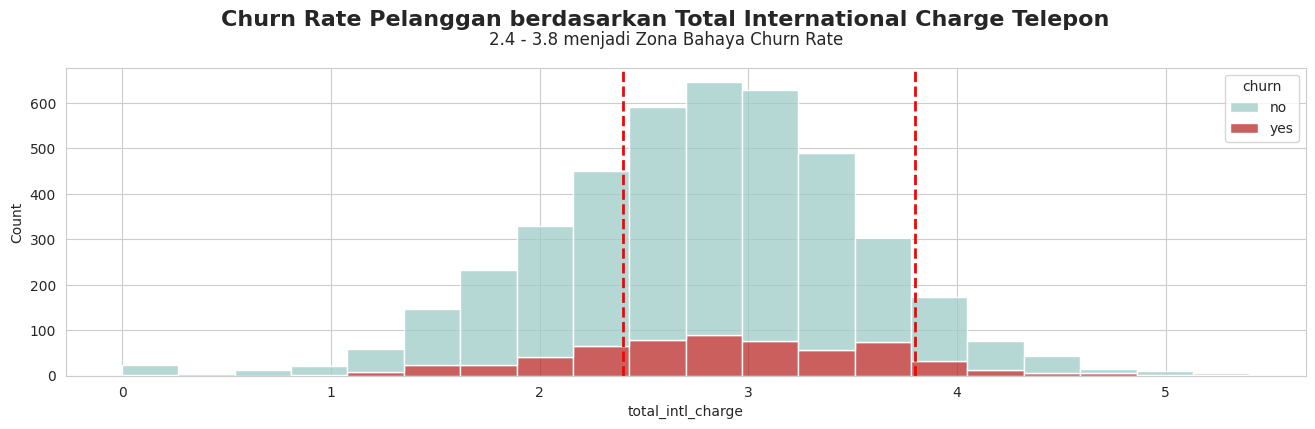

In [ ]:
fig, ax = plt.subplots(figsize=(16, 4))


sns.histplot(df, x='total_intl_charge', bins=20, hue='churn', palette=['#9eccc8', '#b92a27'], multiple='stack', ax=ax)
ax.axvline(x=2.4, color='red', linestyle='dashed', linewidth=2)
ax.axvline(x=3.8, color='red', linestyle='dashed', linewidth=2)

plt.figtext(0.5, 1.0,
           "Churn Rate Pelanggan berdasarkan Total International Charge Telepon",
           ha='center', va='center', fontsize=16, weight='bold')

plt.figtext(0.5, 0.95,
           "2.4 - 3.8 menjadi Zona Bahaya Churn Rate",  # Explanation
           ha='center', va='center', fontsize=12)

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)


plt.show()

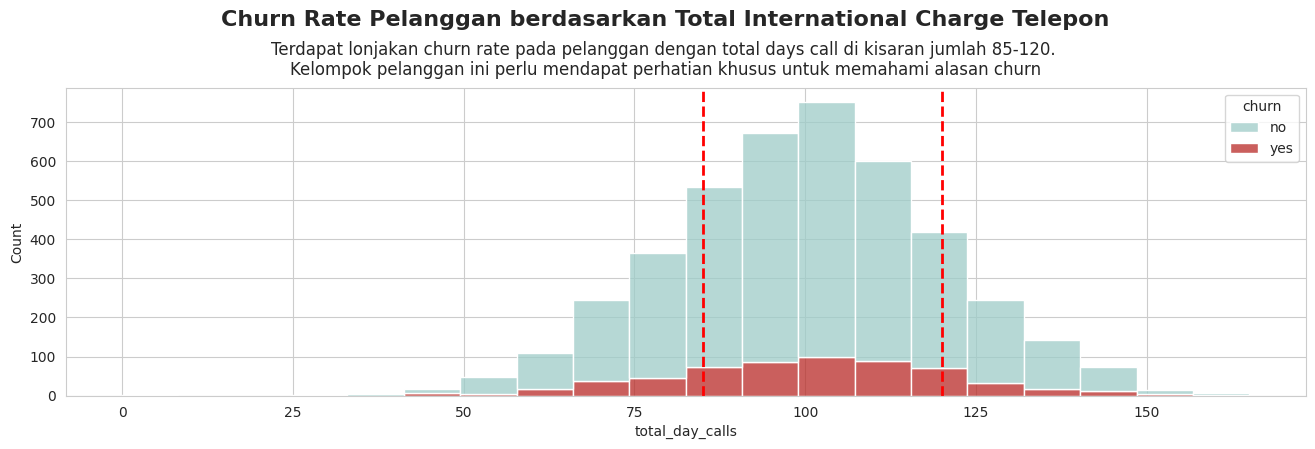

In [ ]:
fig, ax = plt.subplots(figsize=(16, 4))

sns.histplot(df, x='total_day_calls', bins=20, hue='churn', palette=['#9eccc8', '#b92a27'], multiple='stack', ax=ax)

ax.axvline(x=85, color='red', linestyle='dashed', linewidth=2)
ax.axvline(x=120, color='red', linestyle='dashed', linewidth=2)

plt.figtext(0.5, 1.05,
           "Churn Rate Pelanggan berdasarkan Total International Charge Telepon",
           ha='center', va='center', fontsize=16, weight='bold')

plt.figtext(0.5, 0.95,
           "Terdapat lonjakan churn rate pada pelanggan dengan total days call di kisaran jumlah 85-120. \nKelompok pelanggan ini perlu mendapat perhatian khusus untuk memahami alasan churn",  # Explanation
           ha='center', va='center', fontsize=12)
plt.show()